In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import glob

# Specify the folder containing your CSV files
folder_name = '/kaggle/input/generation-by-fuel-type-data/'
file_type = 'csv'  # Change this if your files have a different extension
separator = ','  # Specify the delimiter used in your CSV files (e.g., ',' or ';')

# Read all CSV files in the specified folder and concatenate them into one big dataframe
dataframe = pd.concat([pd.read_csv(f, sep=separator) for f in glob.glob(f"{folder_name}/*.{file_type}")], ignore_index=True)

# Now 'dataframe' contains the combined data from all CSV files
# You can save it to a new CSV file if needed:
dataframe.to_csv('combined_data.csv', index=False)

df = pd.read_csv('combined_data.csv')
df.head()

datetime_beginning_utc datetime_beginning_ept       fuel_type     mw  \
0    3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM            Coal  16579   
1    3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM             Gas  35248   
2    3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM           Hydro   1619   
3    3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM  Multiple Fuels    125   
4    3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM         Nuclear  30394   

   fuel_percentage_of_total  is_renewable  
0                      0.18         False  
1                      0.38         False  
2                      0.02          True  
3                      0.00         False  
4                      0.33         False

In [3]:
df = df.rename(columns={'datetime_beginning_utc' : 'DateTime'})
df.head()

DateTime datetime_beginning_ept       fuel_type     mw  \
0  3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM            Coal  16579   
1  3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM             Gas  35248   
2  3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM           Hydro   1619   
3  3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM  Multiple Fuels    125   
4  3/1/2020 5:00:00 AM   3/1/2020 12:00:00 AM         Nuclear  30394   

   fuel_percentage_of_total  is_renewable  
0                      0.18         False  
1                      0.38         False  
2                      0.02          True  
3                      0.00         False  
4                      0.33         False

In [4]:
#df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %M:%S')
#df.head()

In [5]:
df = df.sort_values(ascending=False,by='DateTime')

In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.head()

DateTime datetime_beginning_ept fuel_type     mw  \
330297 2023-09-09 21:00:00    9/9/2023 5:00:00 PM   Nuclear  32403   
330293 2023-09-09 21:00:00    9/9/2023 5:00:00 PM      Coal  13209   
330302 2023-09-09 21:00:00    9/9/2023 5:00:00 PM      Wind    768   
330301 2023-09-09 21:00:00    9/9/2023 5:00:00 PM   Storage      0   
330300 2023-09-09 21:00:00    9/9/2023 5:00:00 PM     Solar    775   

        fuel_percentage_of_total  is_renewable  
330297                     0.305         False  
330293                     0.123         False  
330302                     0.010          True  
330301                     0.000         False  
330300                     0.010          True

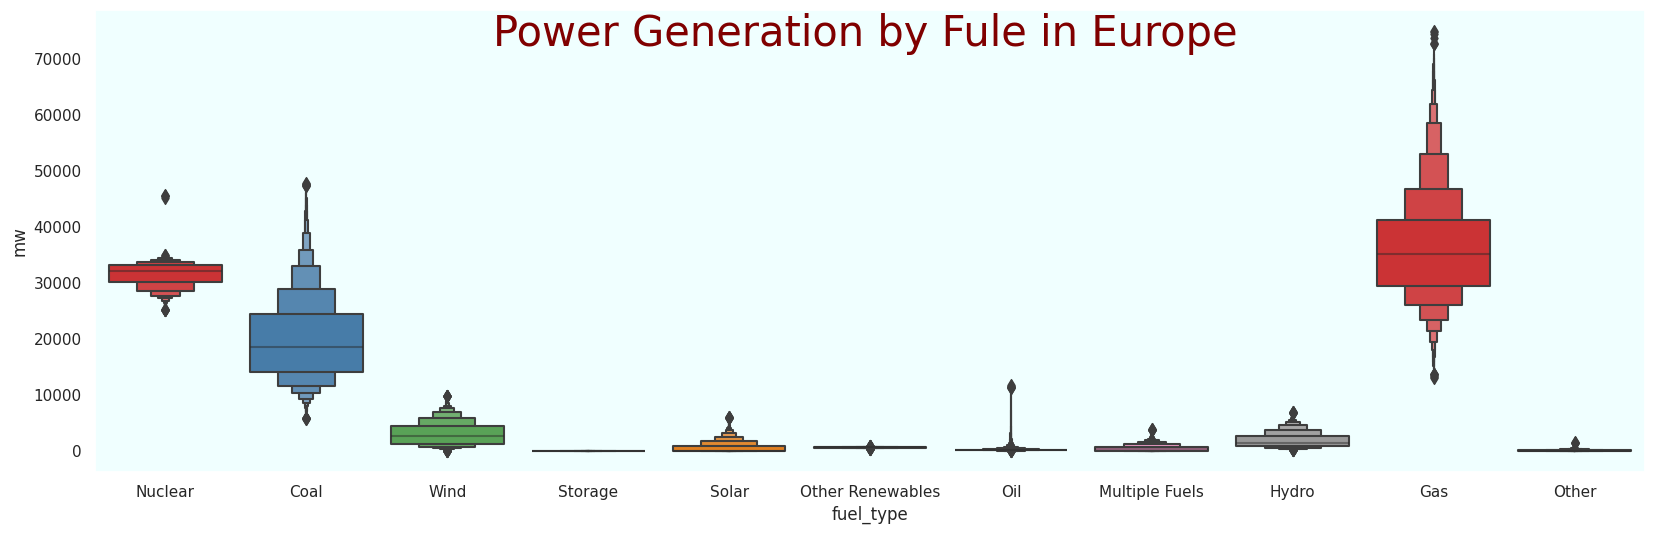

In [7]:
sns.set(rc={"axes.facecolor":"#F0FFFF" , "axes.grid" : False})
plt.figure(figsize=(20,6))
plt.gcf().text(.51, .84, "Power Generation by Fule in Europe", fontsize = 30, color='#800000' ,ha='center', va='center')
sns.boxenplot(x=df['fuel_type'] , y = df['mw'],palette="Set1")
plt.show()

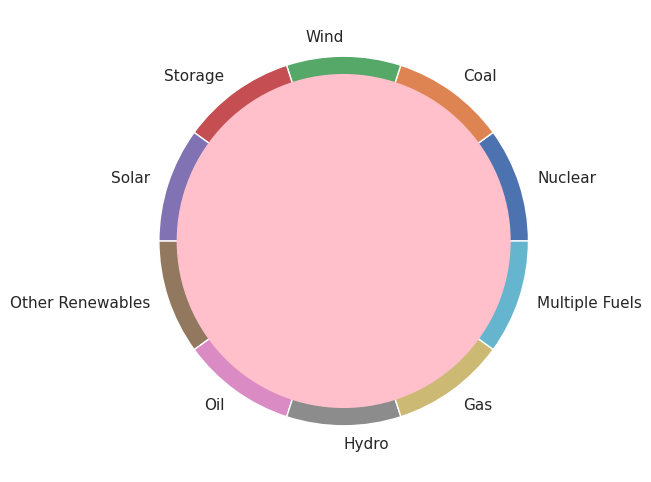

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6 
# Plot a subset of variables
my_circle=plt.Circle( (0,0), 0.9, color='pink')
plt.pie(df['fuel_type'].value_counts()[:10].values, labels = df['fuel_type'].value_counts()[:10].index)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [9]:
df['fuel_type'].value_counts()

fuel_type
Nuclear             52571
Coal                52571
Wind                52571
Storage             52571
Solar               52571
Other Renewables    52571
Oil                 52571
Hydro               52571
Gas                 52571
Multiple Fuels      52500
Other               43527
Name: count, dtype: int64

In [10]:
df.head(1)

DateTime datetime_beginning_ept fuel_type     mw  \
330297 2023-09-09 21:00:00    9/9/2023 5:00:00 PM   Nuclear  32403   

        fuel_percentage_of_total  is_renewable  
330297                     0.305         False

In [11]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df.head()

DateTime datetime_beginning_ept fuel_type     mw  \
330297 2023-09-09 21:00:00    9/9/2023 5:00:00 PM   Nuclear  32403   
330293 2023-09-09 21:00:00    9/9/2023 5:00:00 PM      Coal  13209   
330302 2023-09-09 21:00:00    9/9/2023 5:00:00 PM      Wind    768   
330301 2023-09-09 21:00:00    9/9/2023 5:00:00 PM   Storage      0   
330300 2023-09-09 21:00:00    9/9/2023 5:00:00 PM     Solar    775   

        fuel_percentage_of_total  is_renewable  Year  Month  
330297                     0.305         False  2023      9  
330293                     0.123         False  2023      9  
330302                     0.010          True  2023      9  
330301                     0.000         False  2023      9  
330300                     0.010          True  2023      9

In [12]:
df1 = df[df['fuel_type'] == 'Solar']
df1 = df1[['mw','DateTime']]
display(df1.head(3))
df1 = df1.set_index('DateTime')
df1 = df1.sort_index()
df1.head(3)

mw            DateTime
330300   775 2023-09-09 21:00:00
330420     8 2023-09-09 09:00:00
330310  1126 2023-09-09 20:00:00

mw
DateTime               
2018-03-01 05:00:00   0
2018-03-01 06:00:00   0
2018-03-01 07:00:00   0

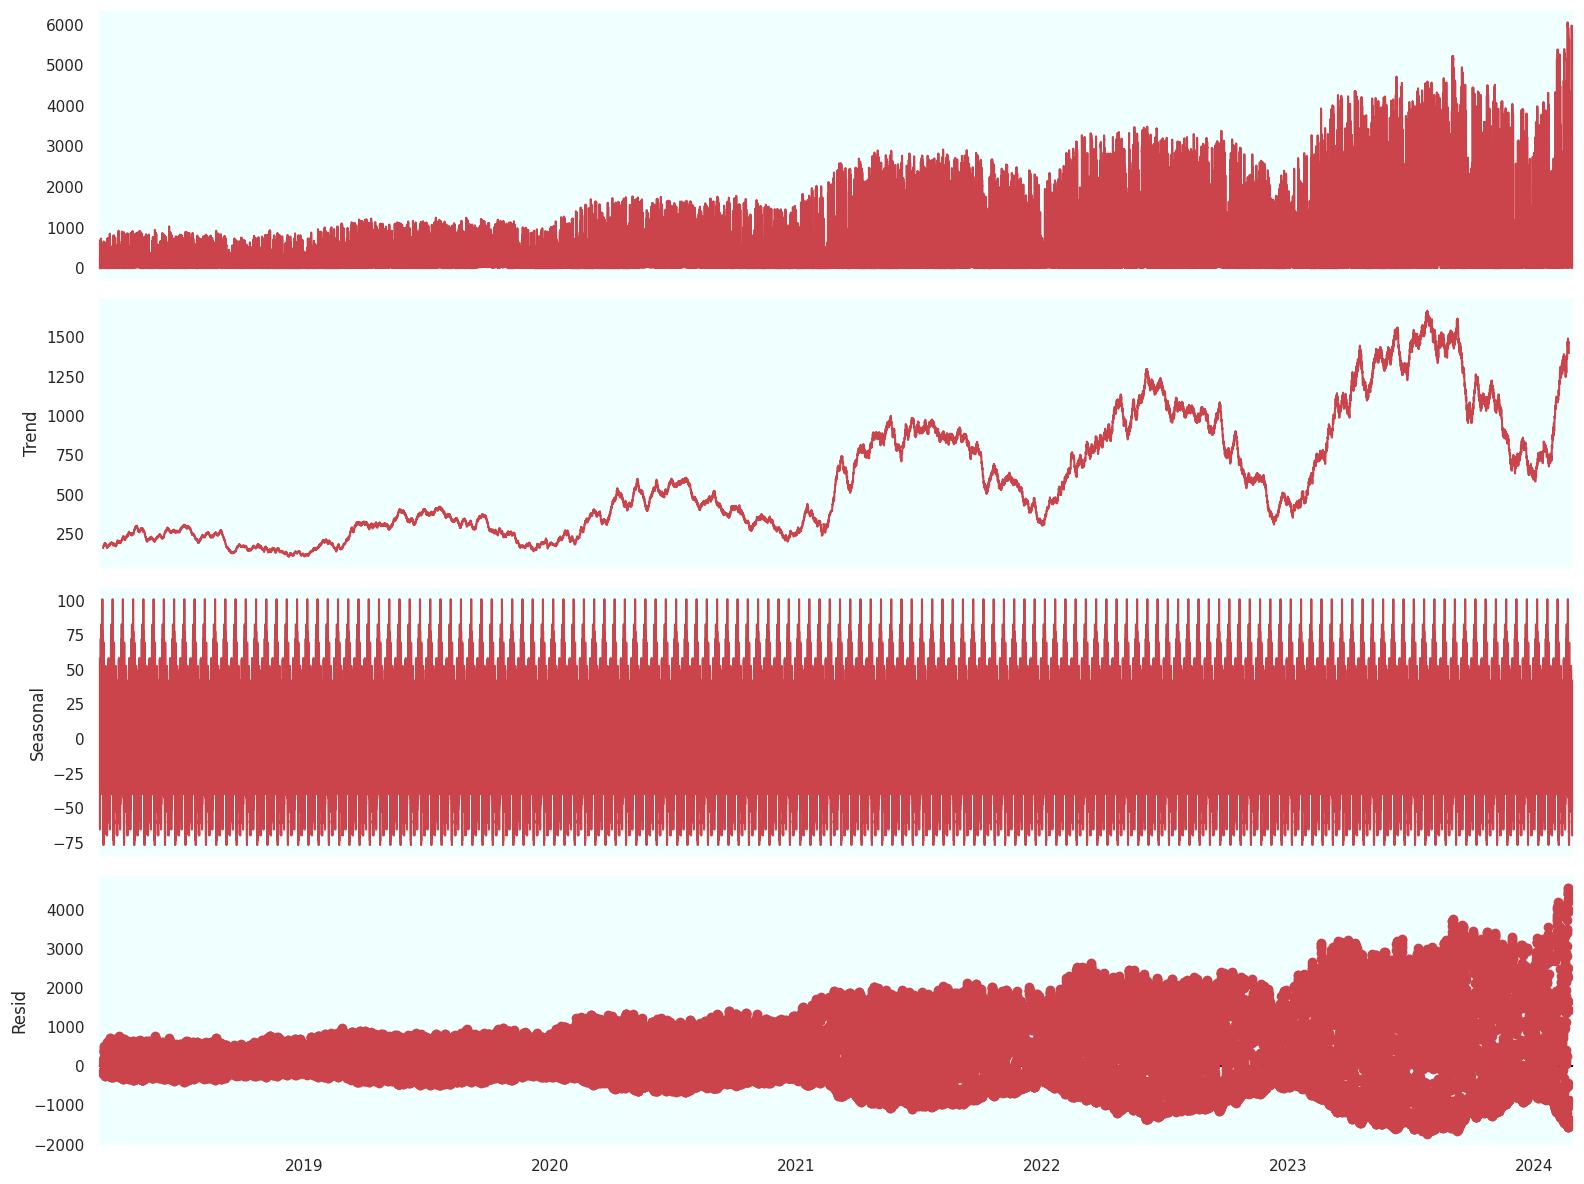

In [13]:
# Set color style
import matplotlib
plt.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['#cc444b', '#e89005'])
plt.rcParams["figure.figsize"] = (16, 12)

from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df1, period=365).plot()
plt.show();

(2192, 2)

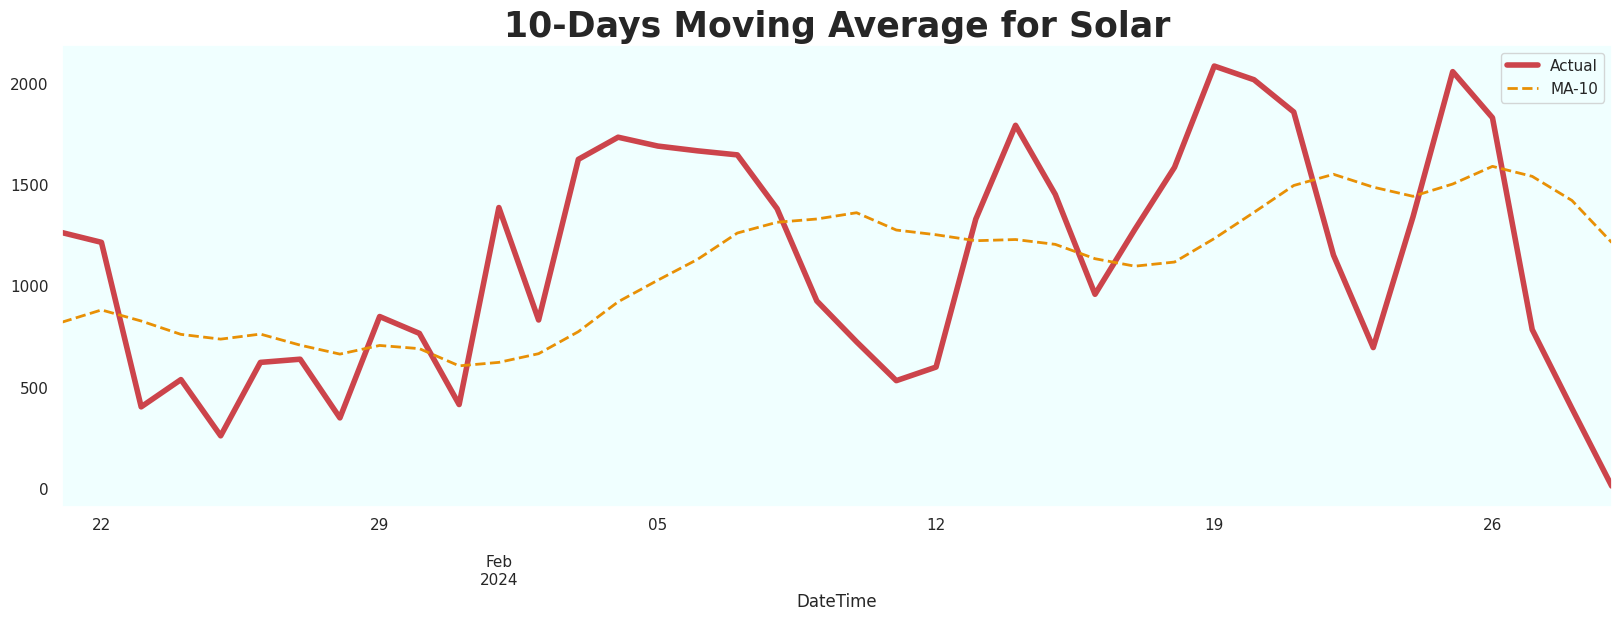

In [14]:
# Solar Power
ma = df1.resample('D').mean()
# 3 Day Example
ma['Moving Average'] = ma['mw'].rolling(5).mean()
display(ma.shape)

def moving_average(data, window):
    data['Moving Average'] = data['mw'].rolling(window).mean()
    actual = data['mw'][-(window+30):]
    ma = data['Moving Average'][-(window+30):]
    
    plt.figure(figsize=(20,6))
    actual.plot(label='Actual', lw=4)
    ma.plot(label='MA-{}'.format(str(window)), ls='--', lw=2)
    plt.title('{}-Days Moving Average for Solar'.format(str(window)), weight='bold', fontsize=25)
    plt.legend()

moving_average(ma, 10)

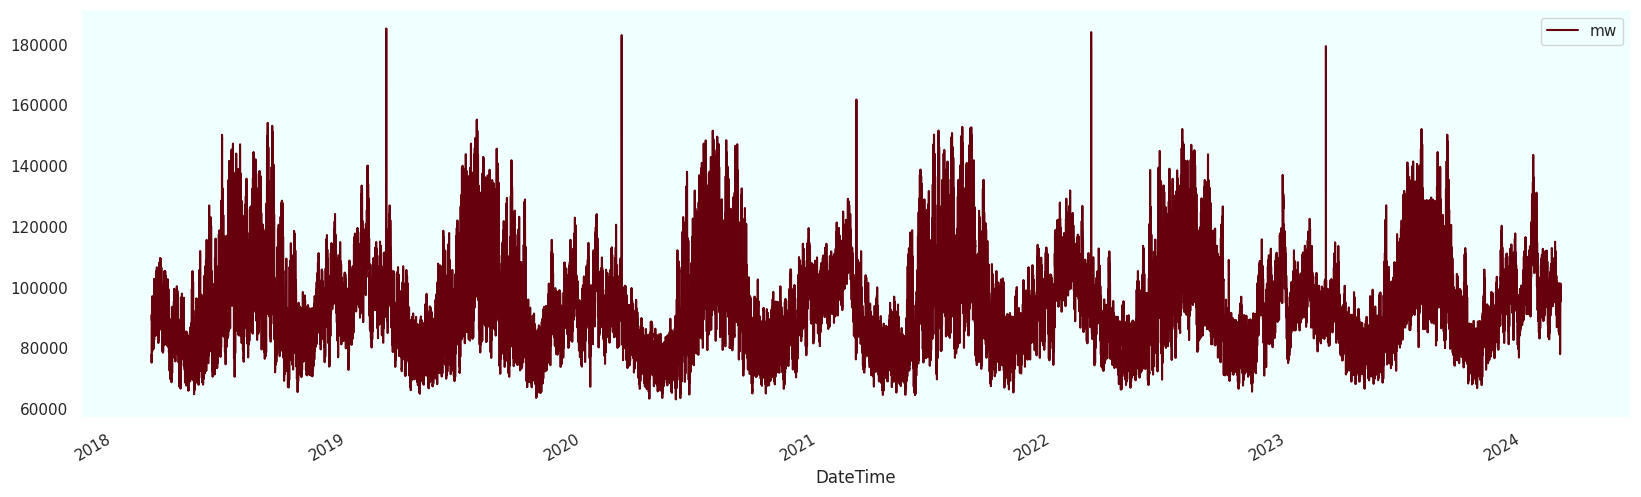

In [15]:
df.groupby('DateTime')['mw'].agg('sum').plot(legend=True, colormap='Reds_r',figsize = (20, 6));

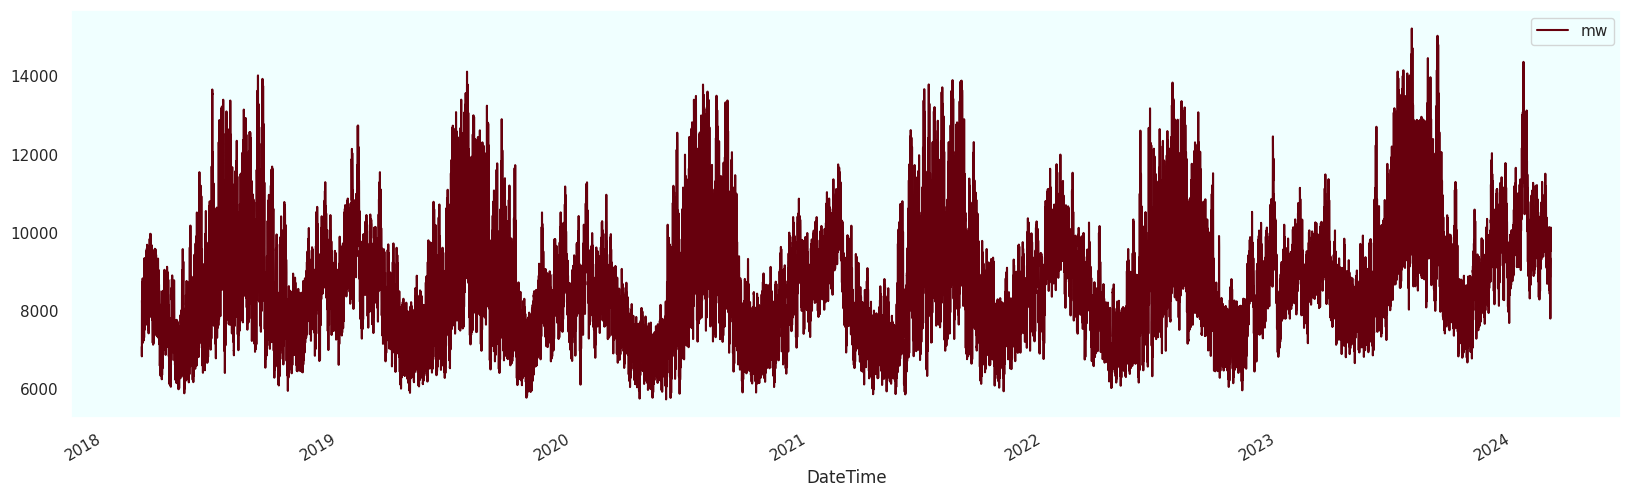

In [16]:
df.groupby('DateTime')['mw'].agg('mean').plot(legend=True, colormap='Reds_r',figsize = (20, 6));

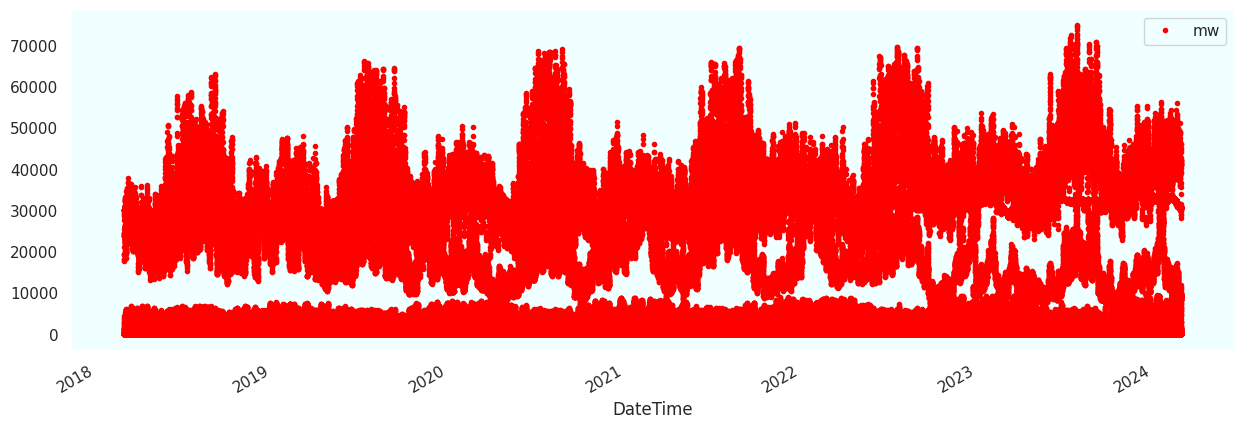

In [17]:
df.plot(x= 'DateTime', y='mw', style='.', figsize = (15, 5),color= "red");

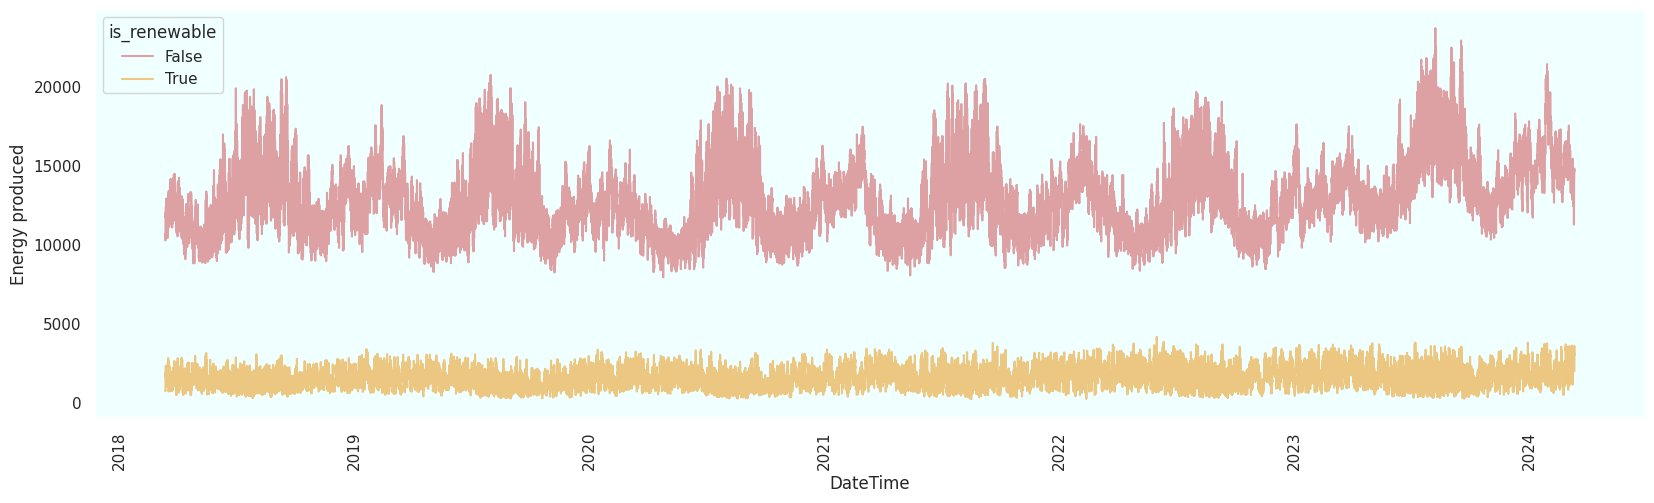

In [18]:
train_avgd = (
    df
    .groupby(['DateTime','is_renewable'])
    ['mw'].mean()
    .unstack()
    .rename({0: 'False', 1:'True'}, axis=1)
)

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
_ = train_avgd.plot(ax=ax, alpha=0.5)
_ = ax.set_ylabel('Energy produced')
plt.xticks(rotation=90);

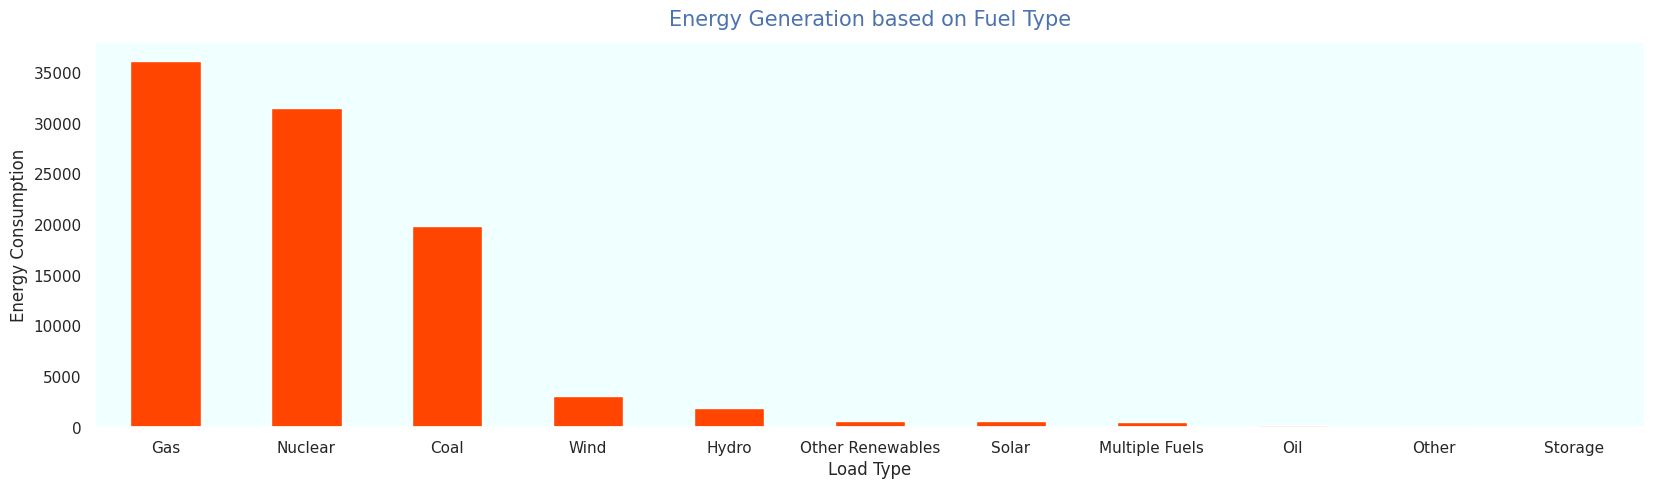

In [19]:
#visualize energy consumption based on load type
plt.rcParams['figure.figsize'] = (20,5)
chart = df.groupby('fuel_type')['mw'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Generation based on Fuel Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption');

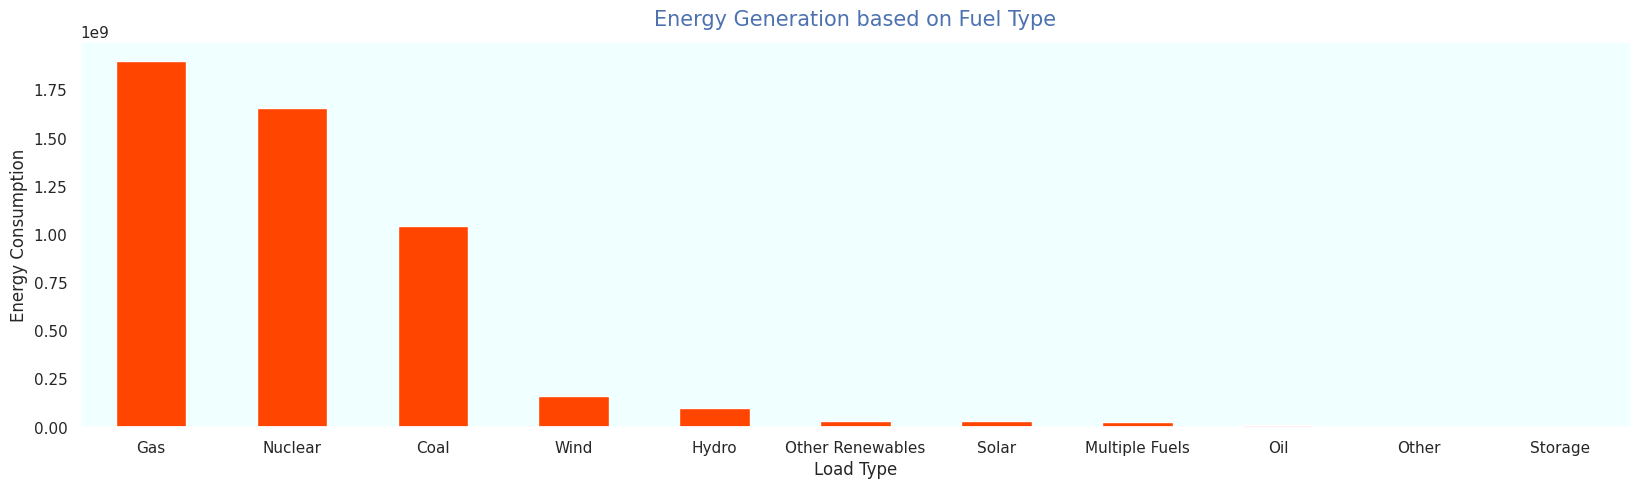

In [20]:
#visualize energy consumption based on load type
plt.rcParams['figure.figsize'] = (20,5)
chart = df.groupby('fuel_type')['mw'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Generation based on Fuel Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption');

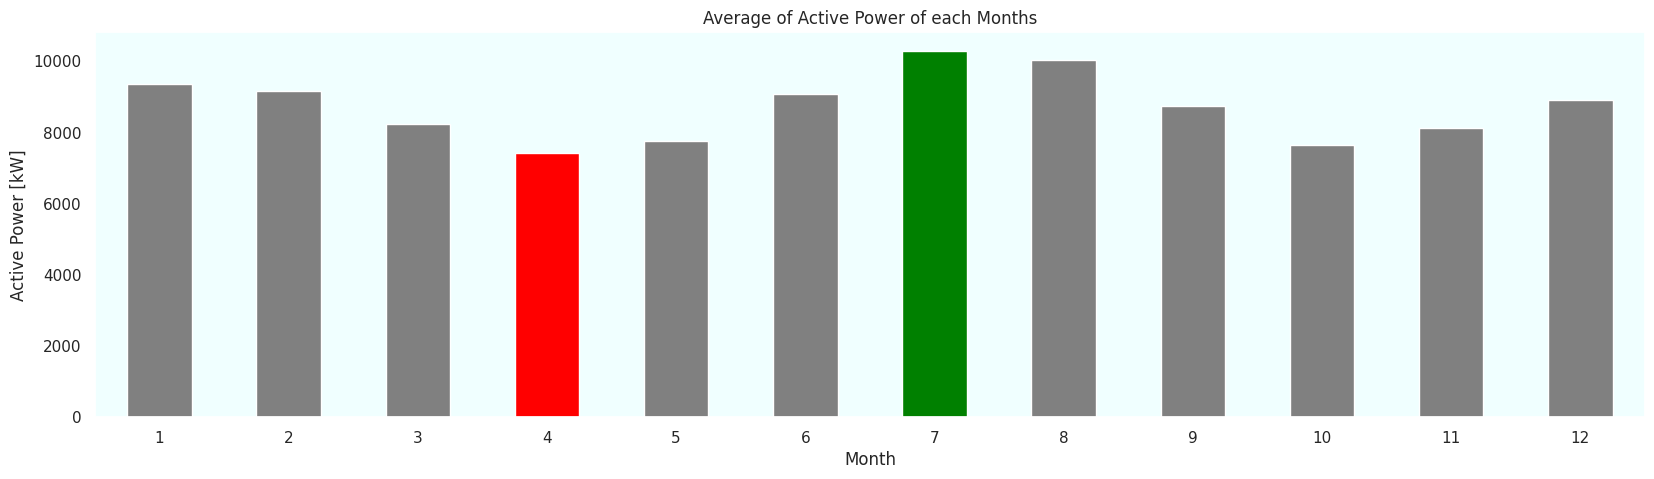

In [21]:
data = df[['Year','mw','Month']].copy('deep')
color = list(np.full(12, 'grey'))
color[6], color[3] = 'Green', 'Red'
data.groupby('Month').mean().mw.plot(kind='bar', title='Average of Active Power of each Months', color=color, rot=0)
plt.ylabel('Active Power [kW]');

<Figure size 1600x600 with 0 Axes>

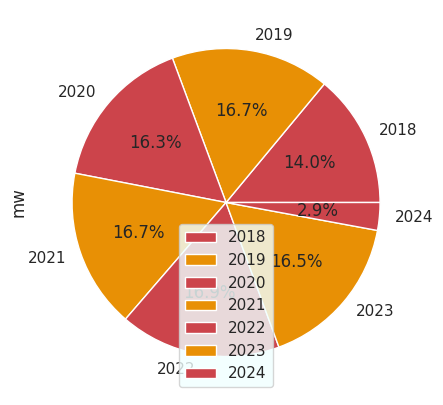

In [22]:
data = df[['fuel_type','Year','mw']].copy('deep')
subdata = data.groupby('Year').sum()['mw']
subdata=subdata.to_frame()
plt.figure(figsize=(16,6))
subdata.plot(kind='pie',legend = True, subplots=True,autopct='%1.1f%%');

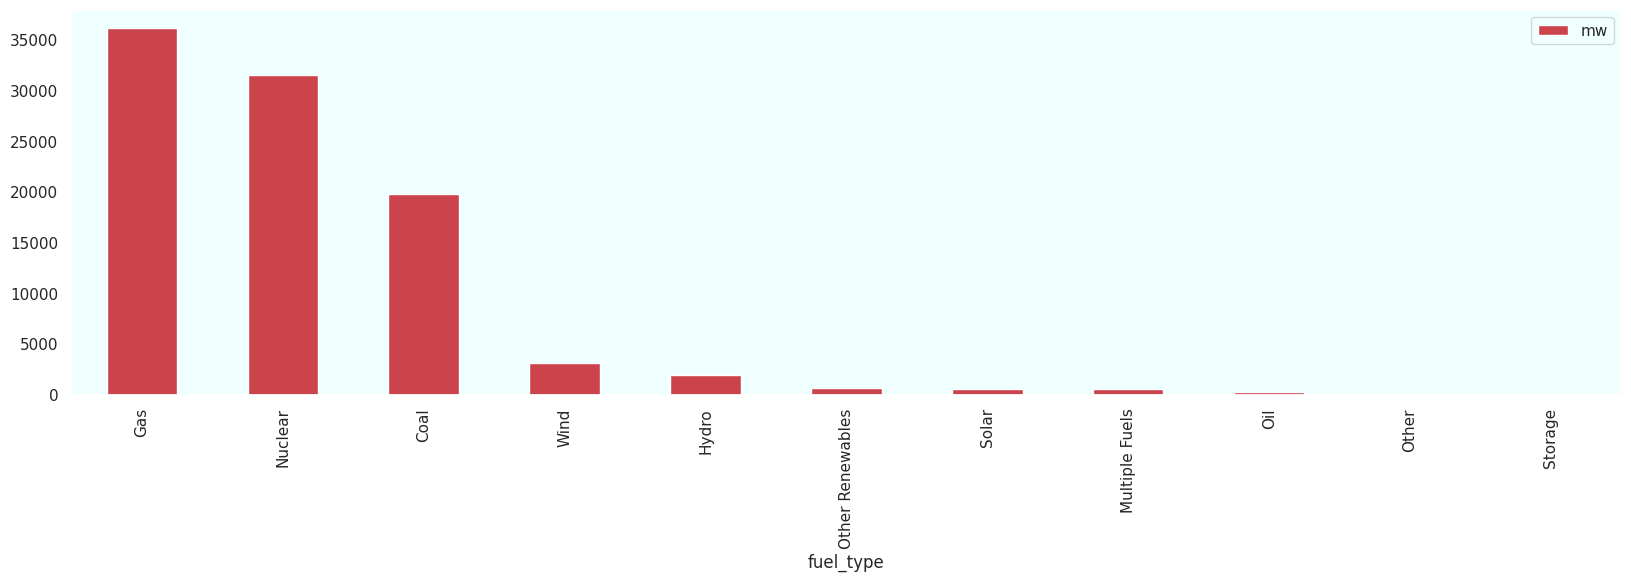

In [23]:
df[['fuel_type', 'mw']].groupby(['fuel_type'], as_index=True).mean().sort_values(by='mw', ascending=False).plot.bar();

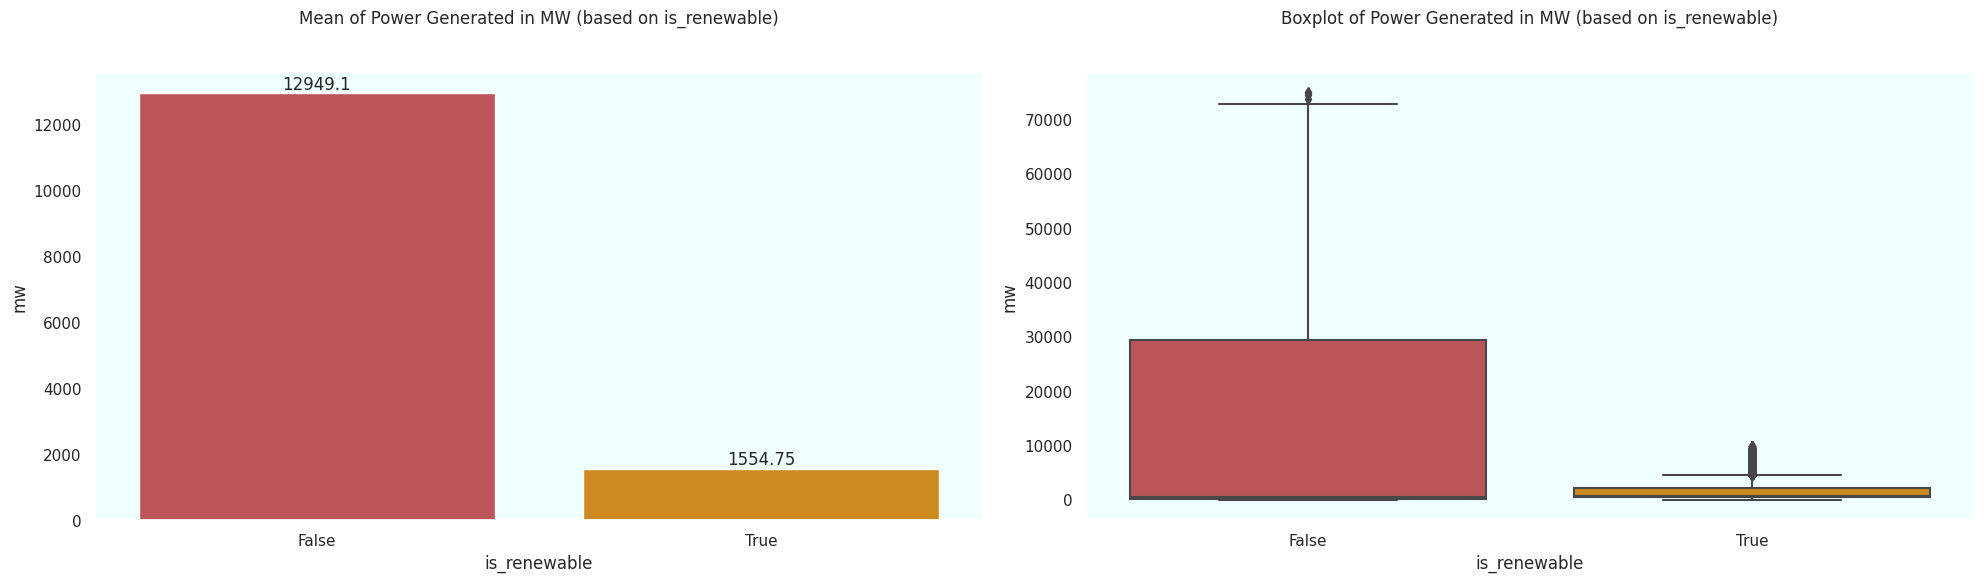

In [24]:
# Mean of Age and Na_to_K based on each feature
for col in ['is_renewable']:
    fig , ax= plt.subplots(1,2, figsize=(20,6))
    gp = df.groupby([col])['mw'].mean().to_frame().reset_index()
    sns.barplot(data=gp, x=col, y='mw', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
    ax[0].set_title(f'Mean of Power Generated in MW (based on {col})', y=1.09)
    sns.boxplot(data=df, x=col, y='mw', ax=ax[1])
    ax[1].set_title(f'Boxplot of Power Generated in MW (based on {col})', y=1.09)
    plt.tight_layout()
    plt.show()

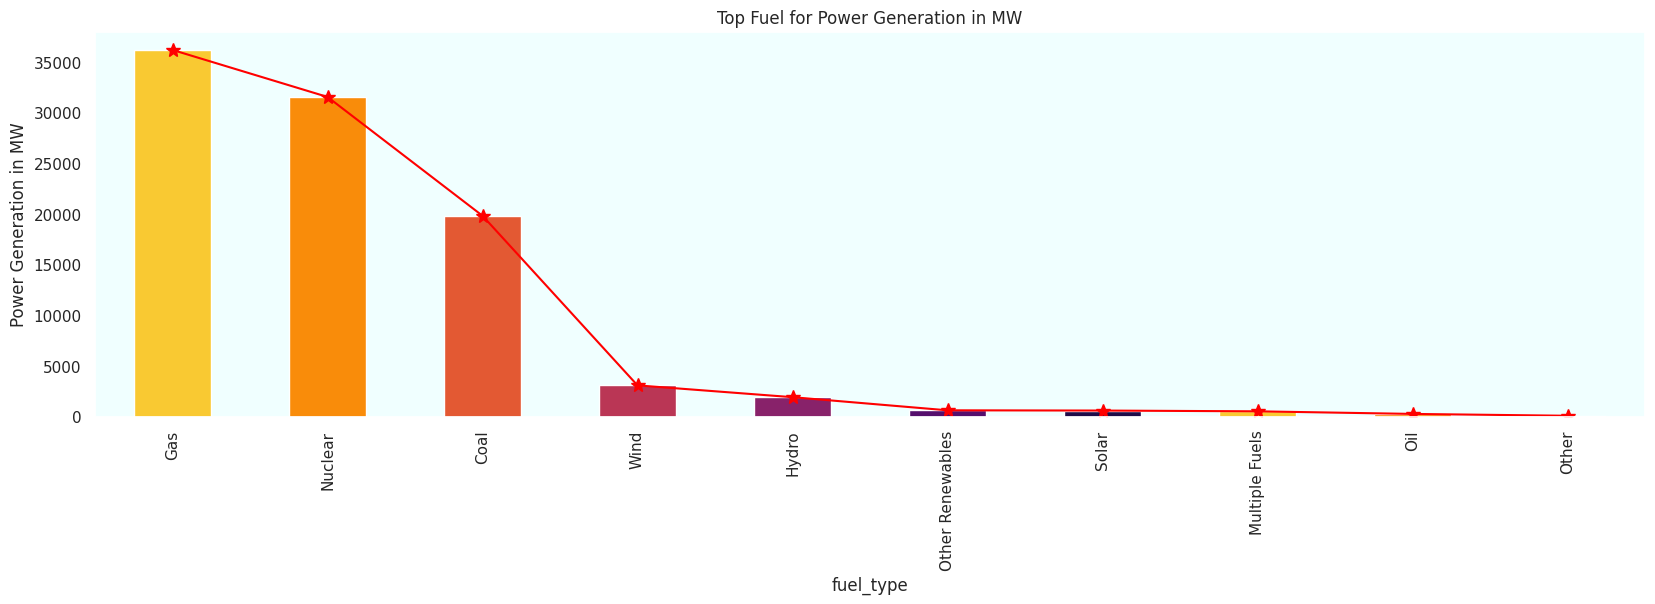

In [25]:
plt.figure(figsize=(20,5))
plt.title('Top Fuel for Power Generation in MW')
plt.ylabel('Power Generation in MW')
df.groupby('fuel_type')['mw'].mean().sort_values(ascending=False)[0:10].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('fuel_type')['mw'].mean().sort_values(ascending=False)[0:10].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

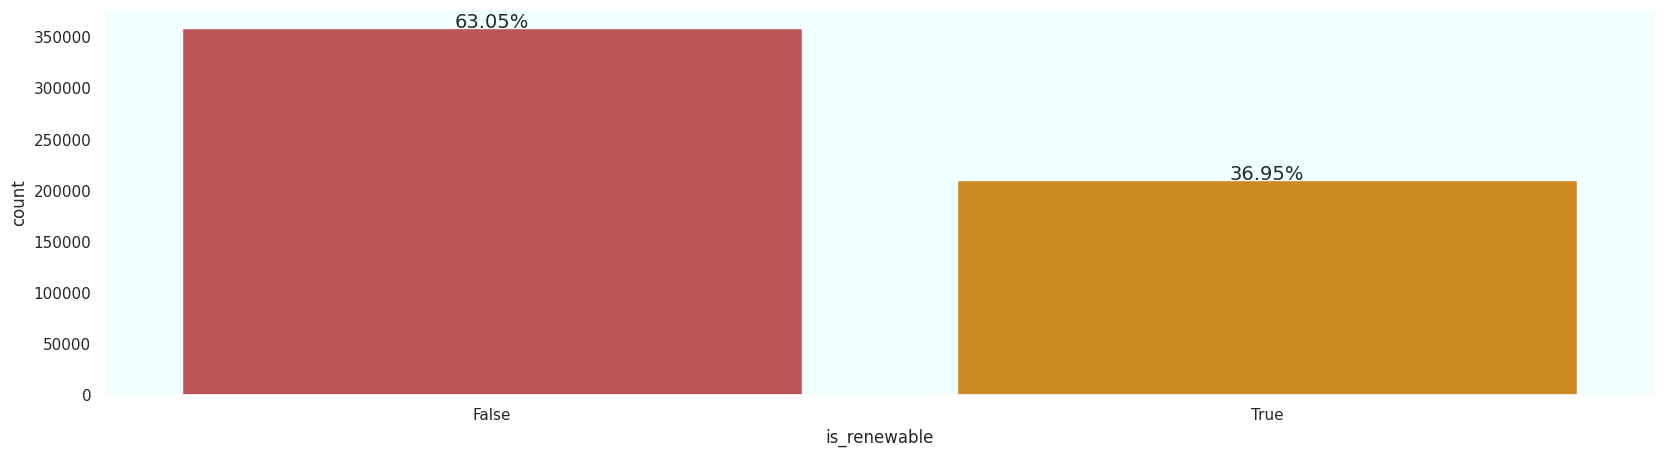

In [26]:
s = sns.countplot(x = 'is_renewable',data = df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=14) 


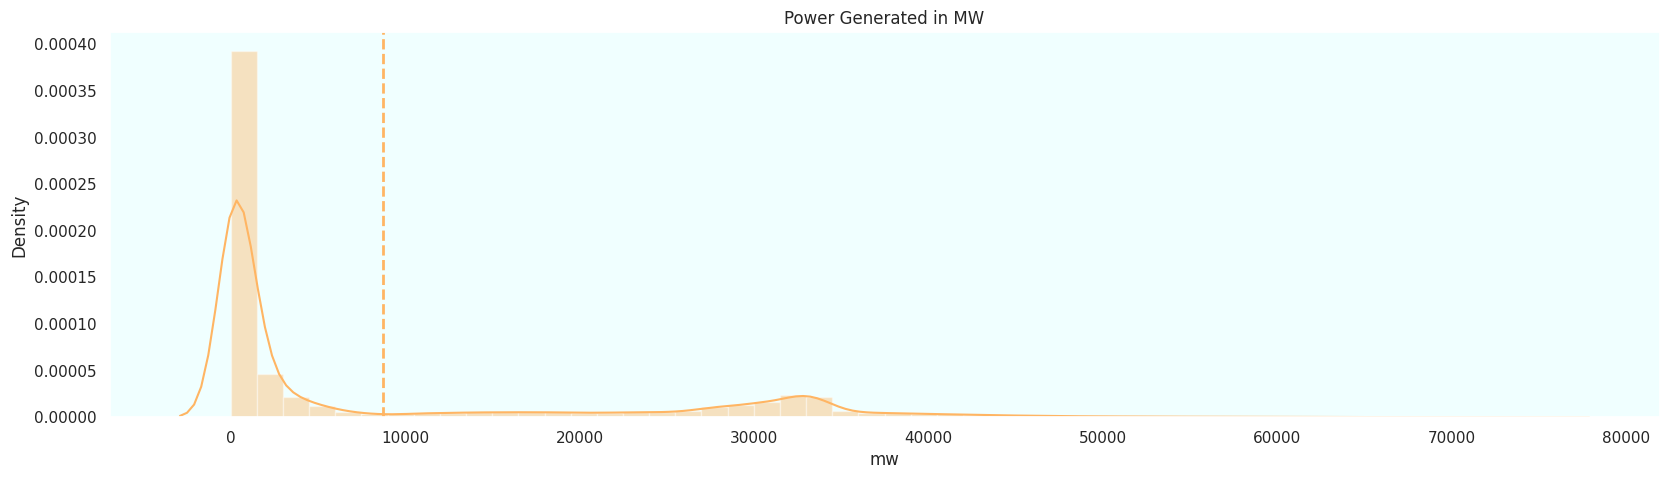

In [27]:
sns.distplot(df['mw'],color='#ffb563')
plt.axvline(x=df['mw'].mean(), color='#ffb563', linestyle='--', linewidth=2)
plt.title('Power Generated in MW');

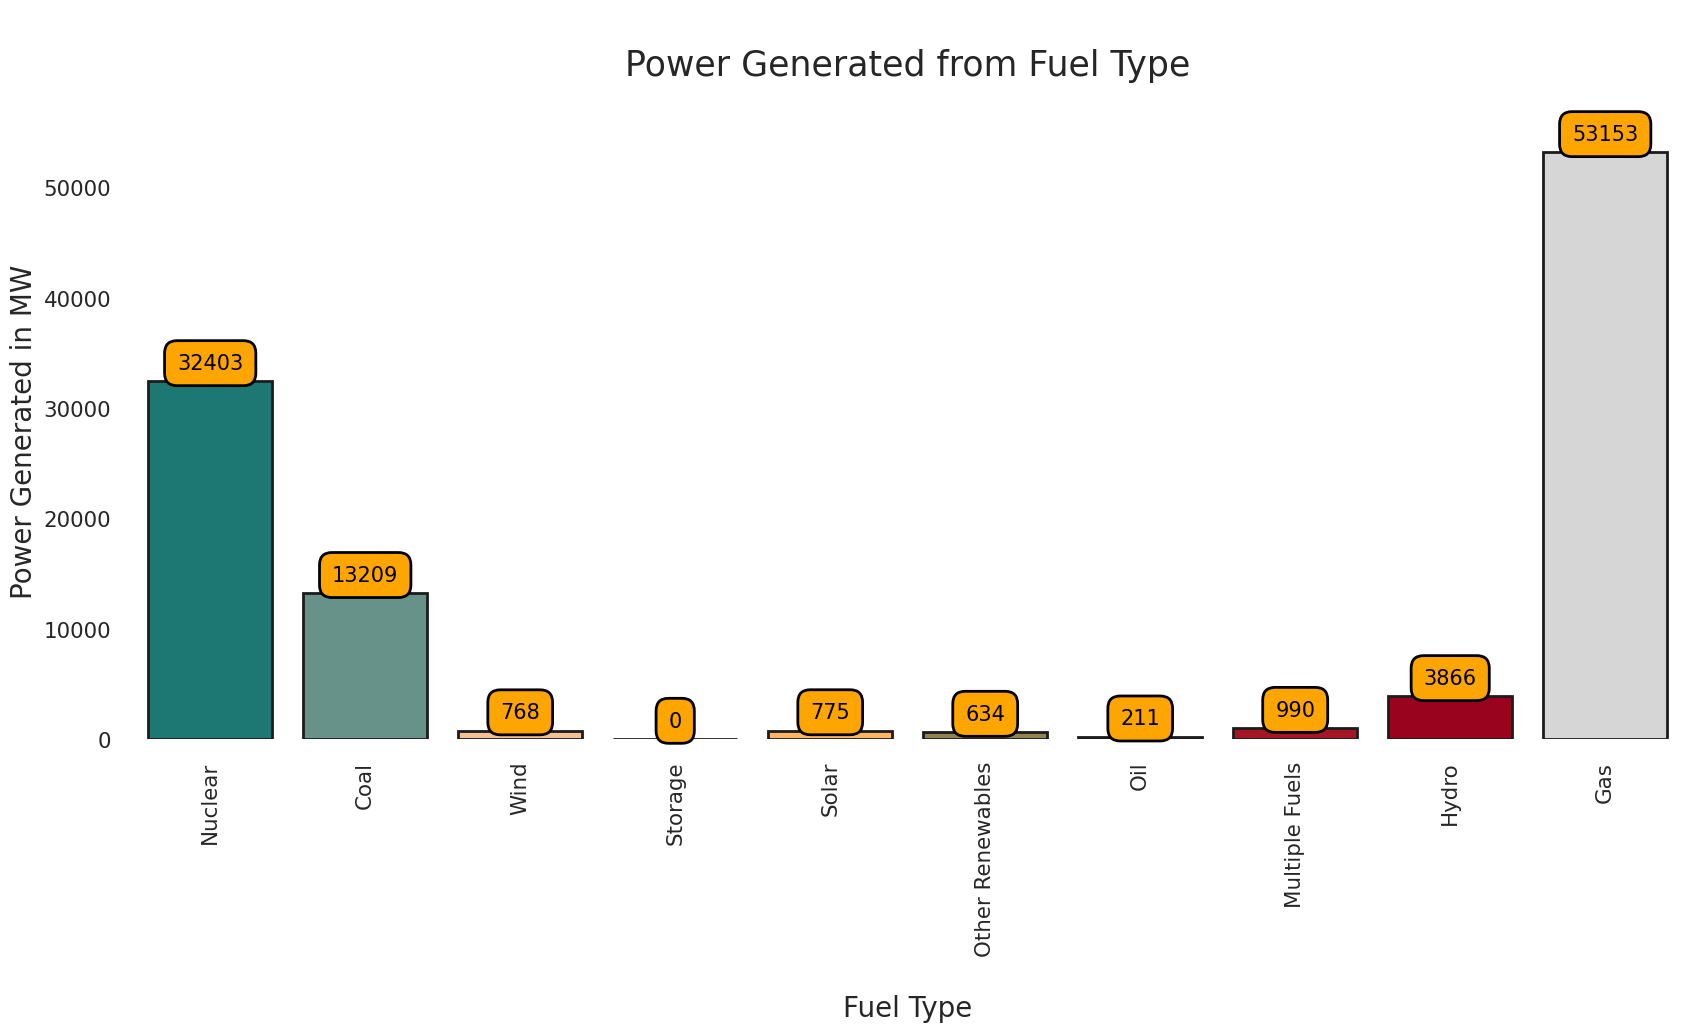

In [28]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

plt.subplots(figsize=(20,8))
p = sns.barplot(x=df["fuel_type"][:10],y=df["mw"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nPower Generated from Fuel Type\n", fontsize=25)
plt.ylabel("Power Generated in MW" , fontsize = 20)
plt.xlabel("\nFuel Type" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "edge",padding = 6,size = 15,color = "black",rotation =0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

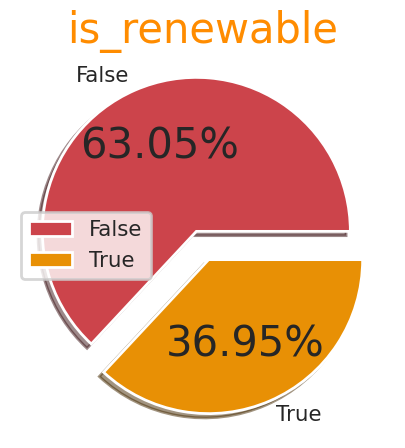

In [29]:
import matplotlib
matplotlib.rcParams.update({'font.size': 30})
ax=df['is_renewable'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "is_renewable", fontsize = 30,color='DarkOrange',font='Lucida Calligraphy');
plt.legend(labels=['False','True'])
plt.axis('off');

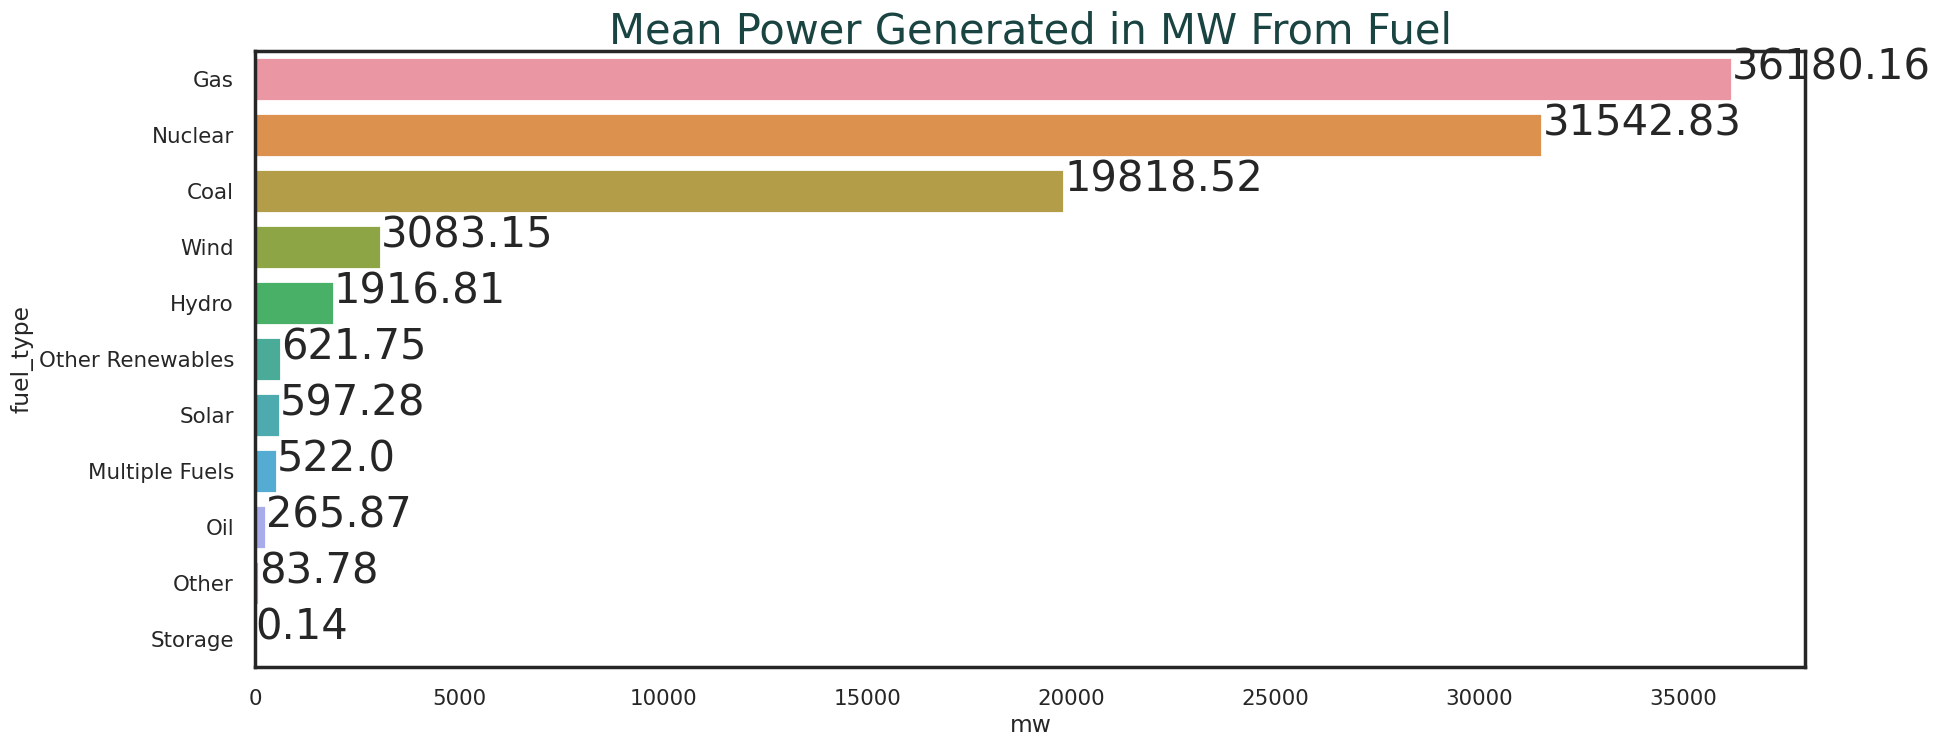

In [30]:
def barw(ax):   
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))


raw_df = df [['fuel_type', 'mw', 'is_renewable']]
df_gc = raw_df.groupby('fuel_type').mean()
df_gc.reset_index(inplace= True)
df_gc[['fuel_type','mw']].sort_values('mw', ascending =False)

plt.figure(figsize=(20,8))
plt.title("Mean Power Generated in MW From Fuel",fontsize=30,color='#1a4441')
ax1 = sns.barplot(data = raw_df, x='mw', y ='fuel_type', order = df_gc.sort_values('mw',ascending =False)['fuel_type'], ci =None)                   
barw(ax1)
plt.show()

In [31]:
df.tail()

DateTime datetime_beginning_ept fuel_type     mw  \
488318 2019-01-01 10:00:00    1/1/2019 5:00:00 AM      Coal  16752   
488326 2019-01-01 10:00:00    1/1/2019 5:00:00 AM     Solar      4   
488327 2019-01-01 10:00:00    1/1/2019 5:00:00 AM   Storage      0   
488328 2019-01-01 10:00:00    1/1/2019 5:00:00 AM      Wind   3162   
488324 2019-01-01 10:00:00    1/1/2019 5:00:00 AM     Other     33   

        fuel_percentage_of_total  is_renewable  Year  Month  
488318                      0.23         False  2019      1  
488326                      0.00          True  2019      1  
488327                      0.00         False  2019      1  
488328                      0.04          True  2019      1  
488324                      0.00         False  2019      1

In [32]:
Fule_type = df.groupby('fuel_type')['mw'].mean()
Fule_type = pd.DataFrame(Fule_type).sort_values(by='mw',ascending=False)

Fule_type

mw
fuel_type                     
Gas               36180.158319
Nuclear           31542.829925
Coal              19818.516254
Wind               3083.147724
Hydro              1916.810827
Other Renewables    621.750376
Solar               597.278785
Multiple Fuels      522.002229
Oil                 265.872458
Other                83.781055
Storage               0.144528

In [33]:
# solar power production per site
counts = df.groupby('fuel_type')['mw'].sum()
Fule_by_PowerGeneration = pd.DataFrame(counts).sort_values(by='mw', ascending=False)

Fule_by_PowerGeneration

mw
fuel_type                   
Gas               1902027103
Nuclear           1658238112
Coal              1041879218
Wind               162084159
Hydro              100768662
Other Renewables    32686039
Solar               31399543
Multiple Fuels      27405117
Oil                 13977181
Other                3646738
Storage                 7598

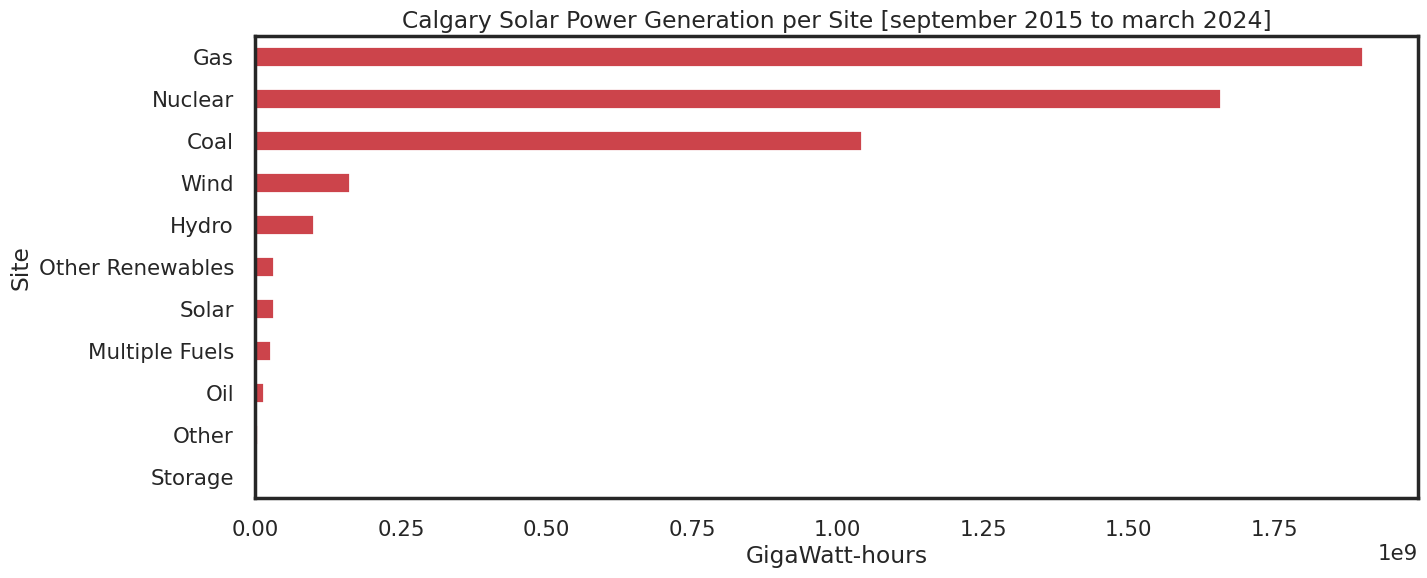

In [34]:
Fule_by_PowerGeneration = Fule_by_PowerGeneration.sort_values(by='mw', ascending=True)

Fule_by_PowerGeneration.plot(figsize=(15, 6), kind='barh', legend=False)
plt.title('Calgary Solar Power Generation per Site [september 2015 to march 2024]')
plt.xlabel('GigaWatt-hours')
plt.ylabel('Site')

plt.show()

In [35]:
df.head()

DateTime datetime_beginning_ept fuel_type     mw  \
330297 2023-09-09 21:00:00    9/9/2023 5:00:00 PM   Nuclear  32403   
330293 2023-09-09 21:00:00    9/9/2023 5:00:00 PM      Coal  13209   
330302 2023-09-09 21:00:00    9/9/2023 5:00:00 PM      Wind    768   
330301 2023-09-09 21:00:00    9/9/2023 5:00:00 PM   Storage      0   
330300 2023-09-09 21:00:00    9/9/2023 5:00:00 PM     Solar    775   

        fuel_percentage_of_total  is_renewable  Year  Month  
330297                     0.305         False  2023      9  
330293                     0.123         False  2023      9  
330302                     0.010          True  2023      9  
330301                     0.000         False  2023      9  
330300                     0.010          True  2023      9

In [36]:
# create df for time series analysis
df['DateTime'] = pd.to_datetime(df['DateTime']) 

df_pw = df.drop(columns= ['fuel_type','datetime_beginning_ept', 'fuel_percentage_of_total', 'is_renewable'])
df_pw = df_pw.set_index('DateTime')

df_pw.head()

mw  Year  Month
DateTime                               
2023-09-09 21:00:00  32403  2023      9
2023-09-09 21:00:00  13209  2023      9
2023-09-09 21:00:00    768  2023      9
2023-09-09 21:00:00      0  2023      9
2023-09-09 21:00:00    775  2023      9

In [37]:
#change to daily frequency
count_date = df_pw.groupby(df_pw.index.date)['mw'].sum()

pw_clean = pd.DataFrame(count_date)
pw_clean['DateTime'] = pd.to_datetime(pw_clean.index) 
pw_clean = pw_clean.set_index('DateTime')

pw_clean.head()

mw
DateTime           
2018-03-01  1634636
2018-03-02  2157340
2018-03-03  2077832
2018-03-04  2019492
2018-03-05  2225286

In [38]:
# Format data for prophet model using ds and y
pw_clean = pw_clean .reset_index().rename(columns={' DateTime ' : 'ds', 'mw'  : 'y'})
pw_clean.head()

DateTime        y
0 2018-03-01  1634636
1 2018-03-02  2157340
2 2018-03-03  2077832
3 2018-03-04  2019492
4 2018-03-05  2225286

In [39]:
pw_clean.set_index('DateTime',drop=True, inplace=True)
pw_clean.head()

y
DateTime           
2018-03-01  1634636
2018-03-02  2157340
2018-03-03  2077832
2018-03-04  2019492
2018-03-05  2225286

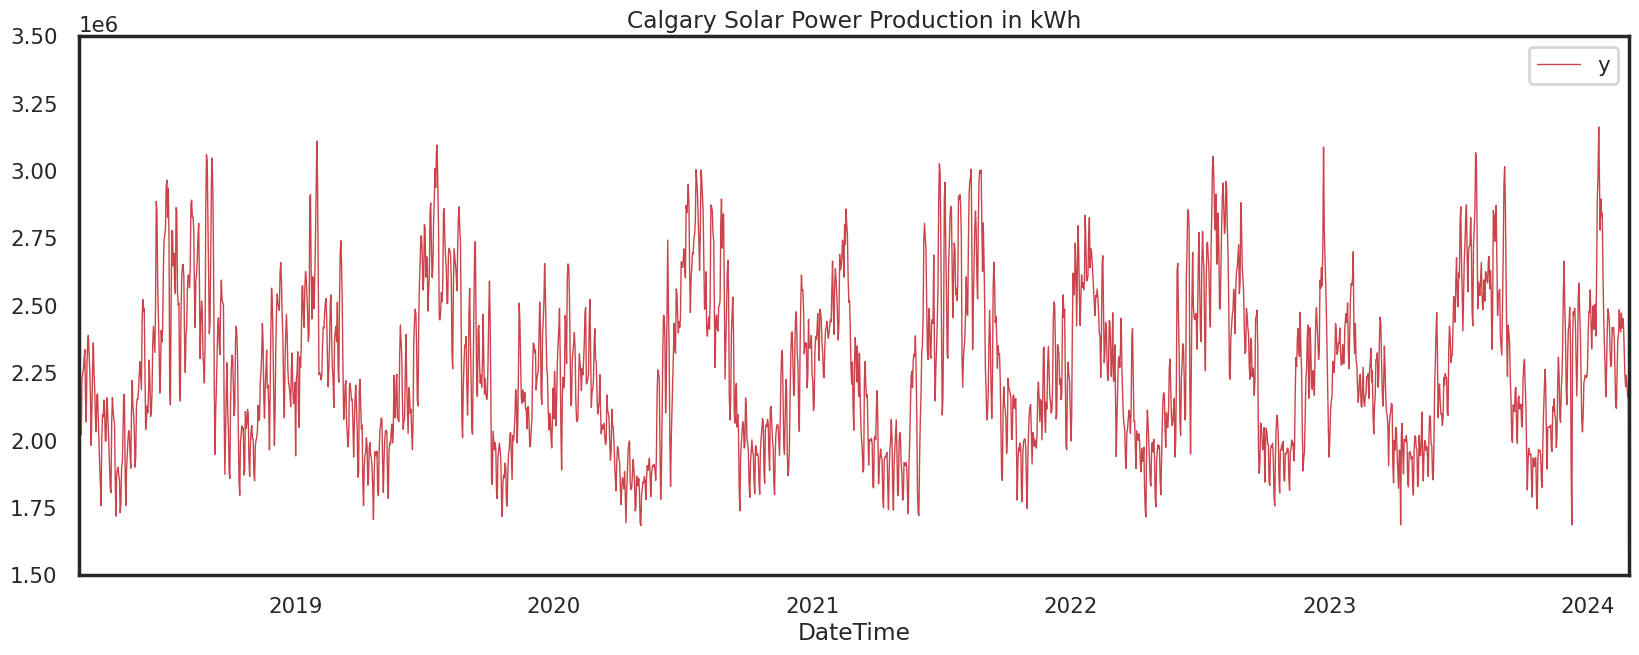

In [40]:
#plot the data
pw_clean.plot(style='-', figsize=(20, 7), lw=1,
              title='Calgary Solar Power Production in kWh')
plt.ylim(1500000,3500000);

plt.show()

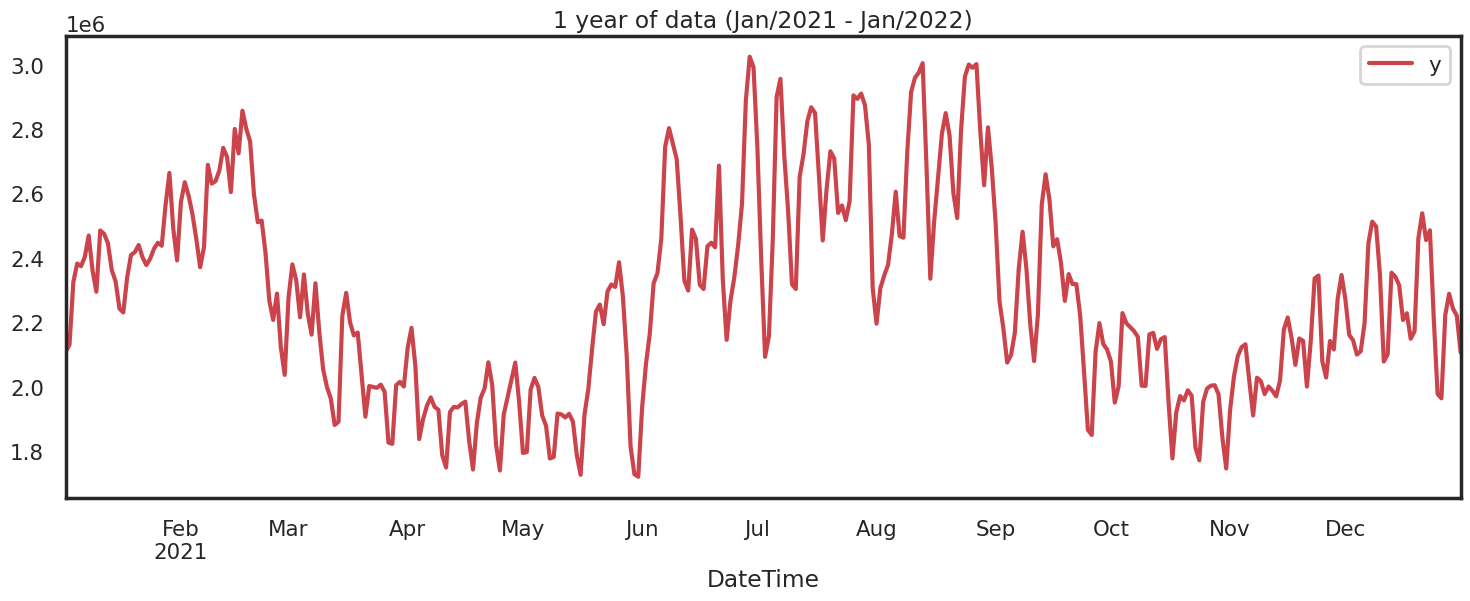

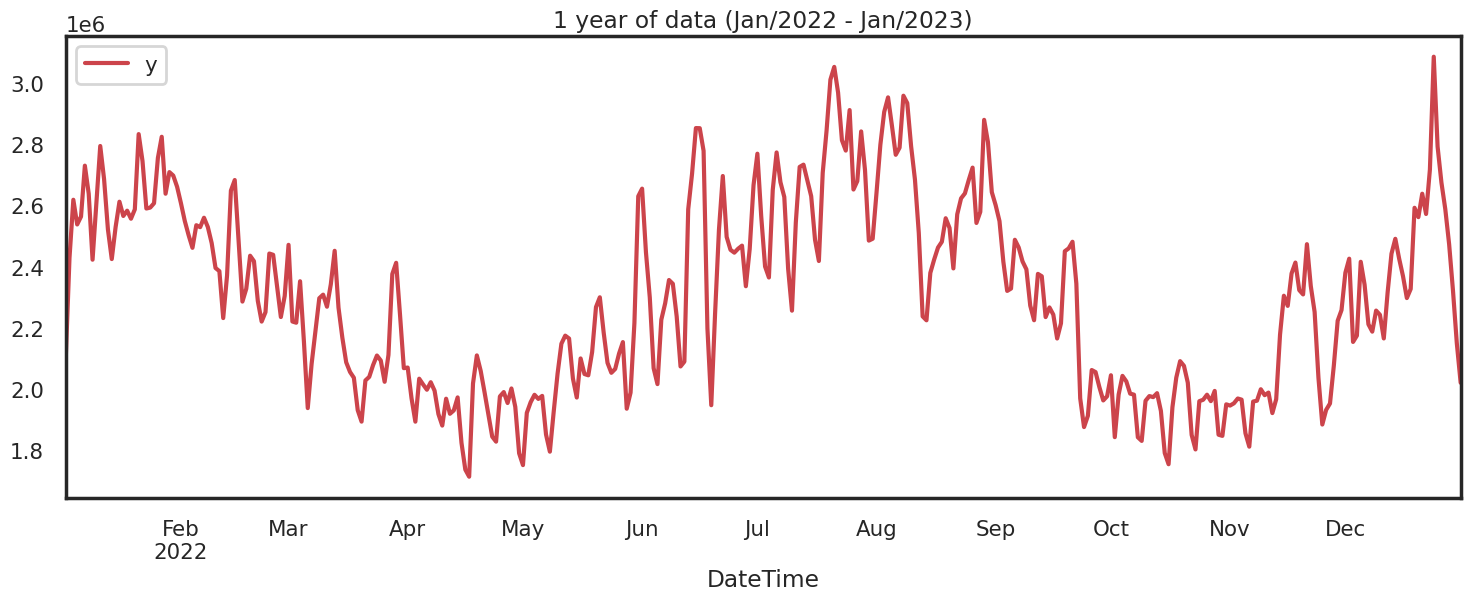

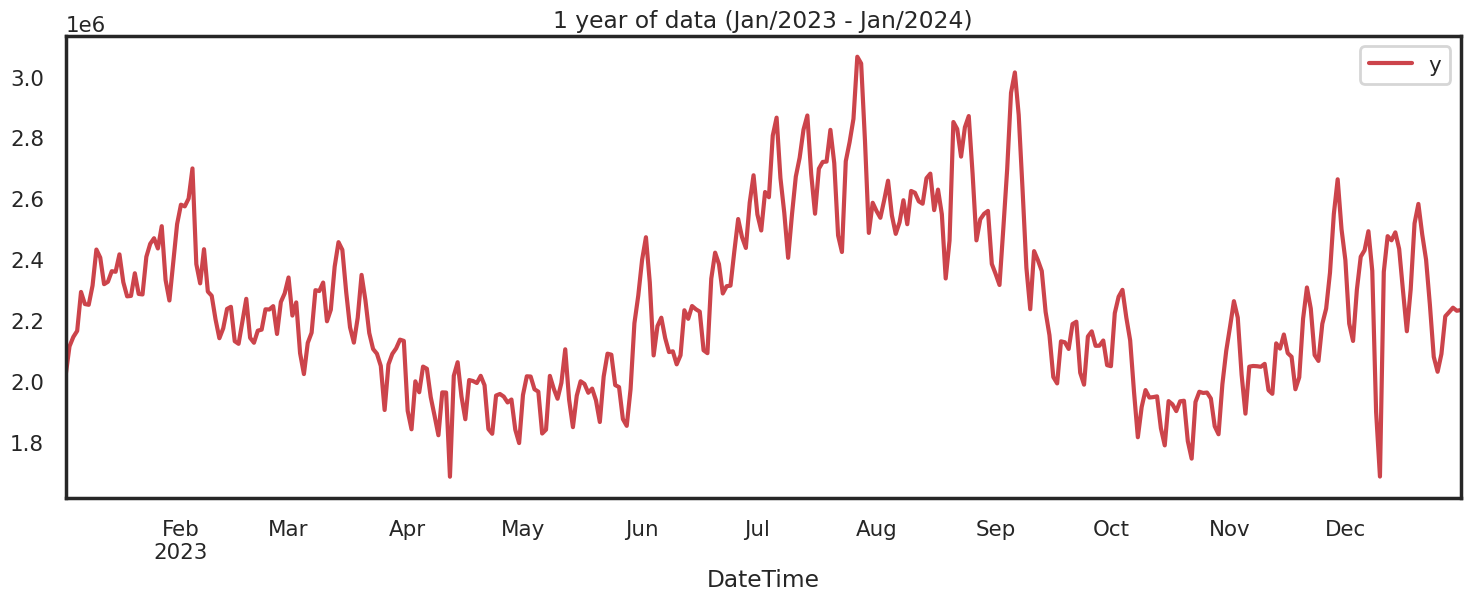

In [41]:
pw_clean.loc[(pw_clean.index > '2021-01-01') & (pw_clean.index < '2022-01-01')] \
    .plot(style='-', figsize=(18, 6), title='1 year of data (Jan/2021 - Jan/2022)')
plt.show()

pw_clean.loc[(pw_clean.index > '2022-01-01') & (pw_clean.index < '2023-01-01')] \
    .plot(style='-', figsize=(18, 6), title='1 year of data (Jan/2022 - Jan/2023)')
plt.show()

pw_clean.loc[(pw_clean.index > '2023-01-01') & (pw_clean.index < '2024-01-01')] \
    .plot(style='-', figsize=(18, 6), title='1 year of data (Jan/2023 - Jan/2024)')
plt.show()

## **Fb-Prophet time series Analysis for Solar Power Generation**

In [42]:
df2 = df[df['fuel_type'] == 'Solar']
df2.head()

DateTime datetime_beginning_ept fuel_type    mw  \
330300 2023-09-09 21:00:00    9/9/2023 5:00:00 PM     Solar   775   
330420 2023-09-09 09:00:00    9/9/2023 5:00:00 AM     Solar     8   
330310 2023-09-09 20:00:00    9/9/2023 4:00:00 PM     Solar  1126   
330430 2023-09-09 08:00:00    9/9/2023 4:00:00 AM     Solar     8   
330320 2023-09-09 19:00:00    9/9/2023 3:00:00 PM     Solar  1514   

        fuel_percentage_of_total  is_renewable  Year  Month  
330300                      0.01          True  2023      9  
330420                      0.00          True  2023      9  
330310                      0.01          True  2023      9  
330430                      0.00          True  2023      9  
330320                      0.01          True  2023      9

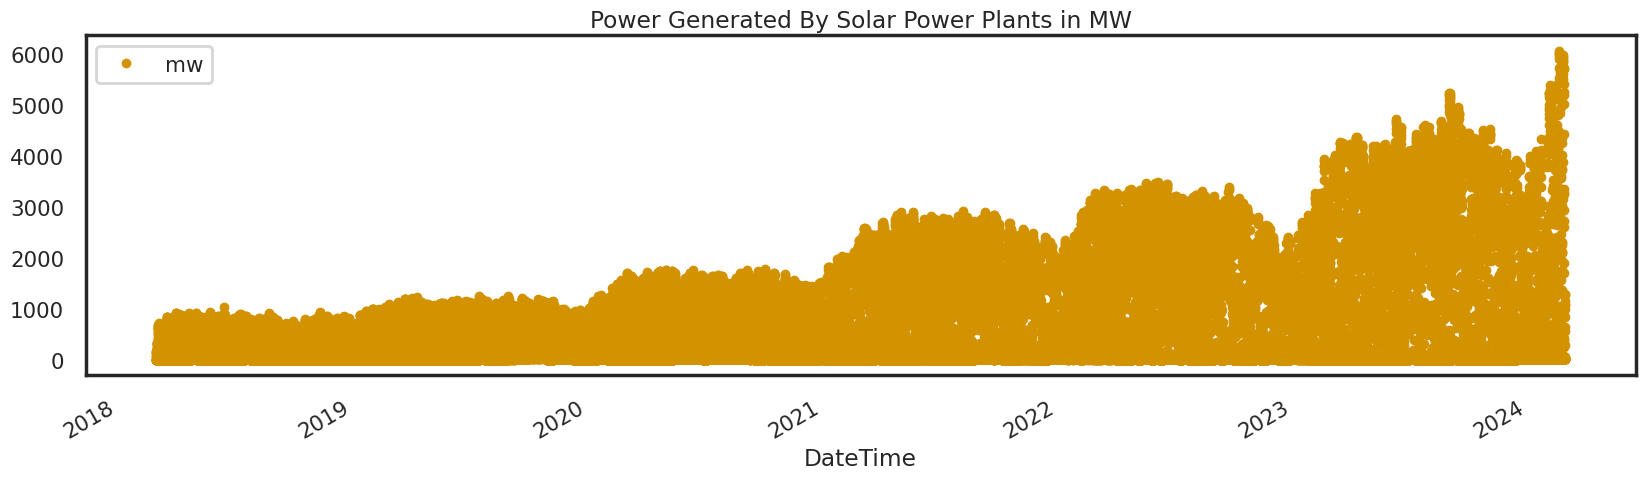

In [43]:
df3 = df2[["DateTime","mw"]]
df3.set_index("DateTime", inplace = True)
df3 = df3.sort_index()

# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00","#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
df3.plot(style='.', figsize=(20,5), color=color_pal[1], title='Power Generated By Solar Power Plants in MW')
plt.ylim();
plt.show()

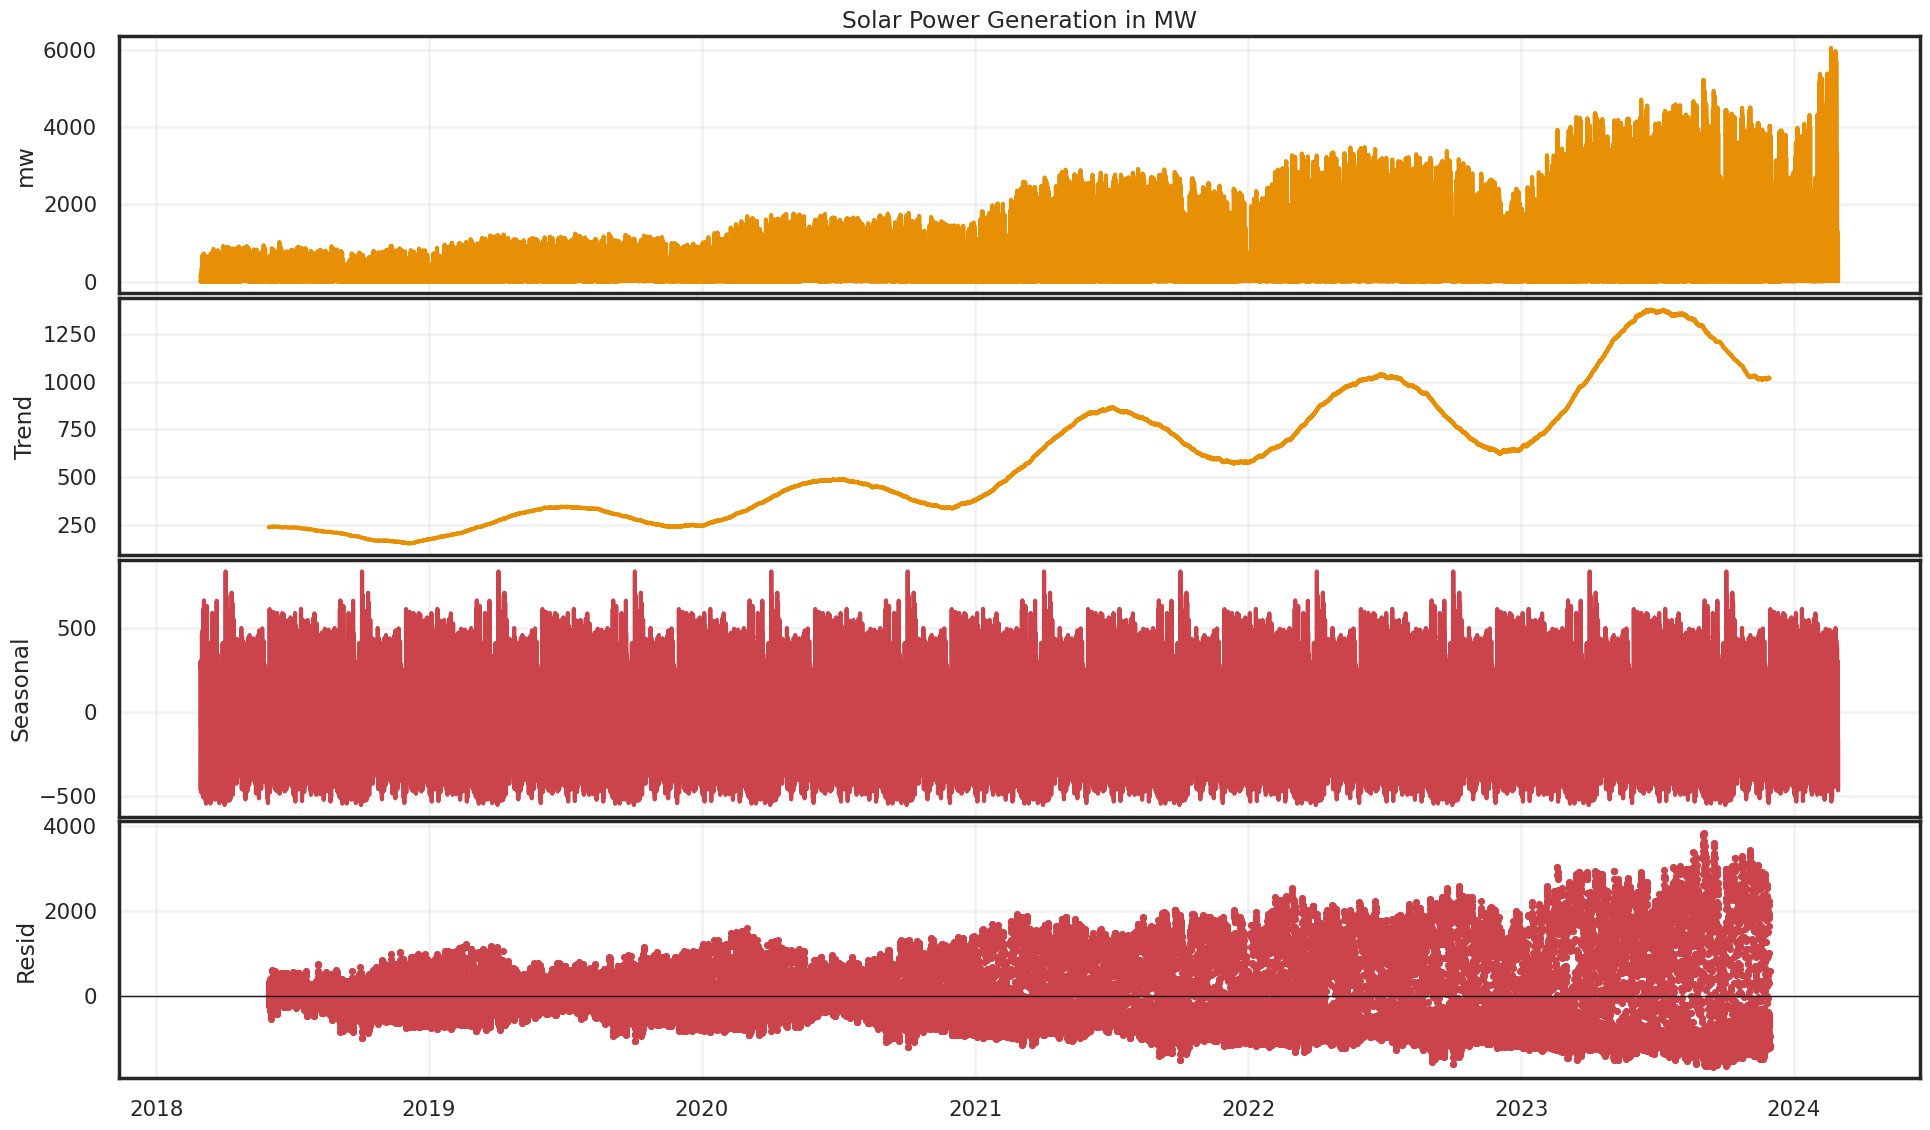

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decompose_plotter(df: pd.DataFrame, period=12, title='', figsize=(20, 12)):
    """
    Perform and plot seasonal decomposition of a time series.

    Parameters:
        df: DataFrame with time series data.
        col: Column name for data to decompose. Default is 'sqrt(O3 AQI)'.
        date_col: Column name for datetime values. Default is 'Date'.
        period: Seasonality period. Default is 12.

    Returns:
        A DecomposeResult object with seasonal, trend, and residual components.
    """
    # Decompostion
    decomposition = seasonal_decompose(df.values, period=period)
    de_season = decomposition.seasonal
    de_resid = decomposition.resid
    de_trend = decomposition.trend

    fig, ax = plt.subplots(4, sharex=True, figsize=figsize)

    ax[0].set_title(title)
    ax[0].plot(df.index, df.values, color='C3')
    ax[0].set_ylabel(df.keys()[0])
    ax[0].grid(alpha=0.25)
    
    ax[1].plot(df.index, de_trend, color='C1')
    ax[1].set_ylabel('Trend')
    ax[1].grid(alpha=0.25)
    
    ax[2].plot(df.index, de_season, color='C2')
    ax[2].set_ylabel('Seasonal')
    ax[2].grid(alpha=0.25)

    ax[3].axhline(y=0, color='k', linewidth=1)
    ax[3].scatter(df.index, de_resid, color='C0', s=10)
    ax[3].set_ylabel('Resid')
    ax[3].grid(alpha=0.25)
    
    plt.tight_layout(h_pad=0)
    plt.show()
    
    return decomposition


_ = seasonal_decompose_plotter(df3, period=365*12, title='Solar Power Generation in MW', figsize=(20, 12))

In [45]:
df4 = df2[["DateTime","mw"]]
df_solar = df4.sort_values(by='DateTime', ascending=True)
df_solar.head()

DateTime  mw
569163 2018-03-01 05:00:00   0
569152 2018-03-01 06:00:00   0
569141 2018-03-01 07:00:00   0
569130 2018-03-01 08:00:00   0
569119 2018-03-01 09:00:00   0

In [46]:
# Format data for prophet model using ds and y
df_solar  = df_solar.rename(columns={'DateTime':'ds','mw':'y'})
df_solar.head()

ds  y
569163 2018-03-01 05:00:00  0
569152 2018-03-01 06:00:00  0
569141 2018-03-01 07:00:00  0
569130 2018-03-01 08:00:00  0
569119 2018-03-01 09:00:00  0

In [47]:
from prophet import Prophet
## Creating model parameters
model_param ={
    "daily_seasonality": True,
    "weekly_seasonality":True,
    "yearly_seasonality":True,
    "seasonality_mode": "multiplicative",
    "changepoint_prior_scale":0.5
}

In [48]:
model = Prophet(**model_param)
model.fit(df_solar)
 
# Create future dataframe
future= model.make_future_dataframe(periods=365*24*2 ,freq='h')
forecast= model.predict(future)

13:01:54 - cmdstanpy - INFO - Chain [1] start processing
13:03:12 - cmdstanpy - INFO - Chain [1] done processing


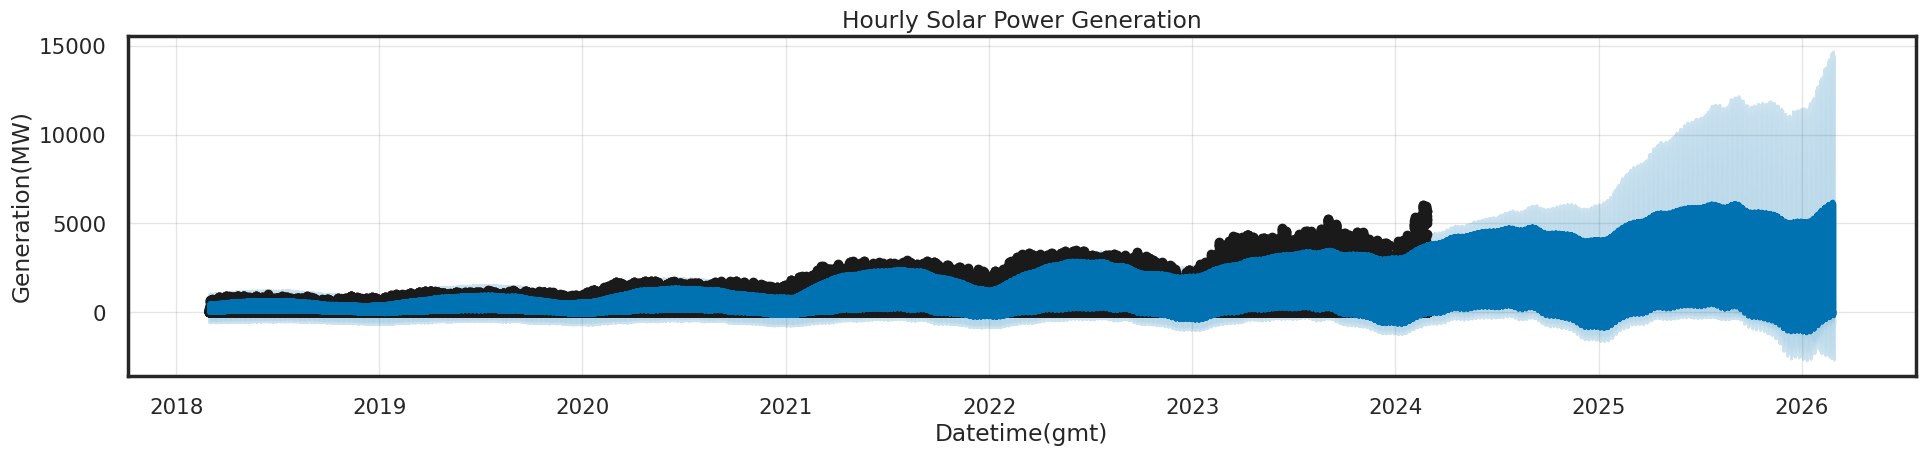

In [49]:
fig = model.plot(forecast, xlabel='Datetime(gmt)', ylabel=r'Generation(MW)',figsize=(20, 5))
plt.title('Hourly Solar Power Generation')
plt.show()

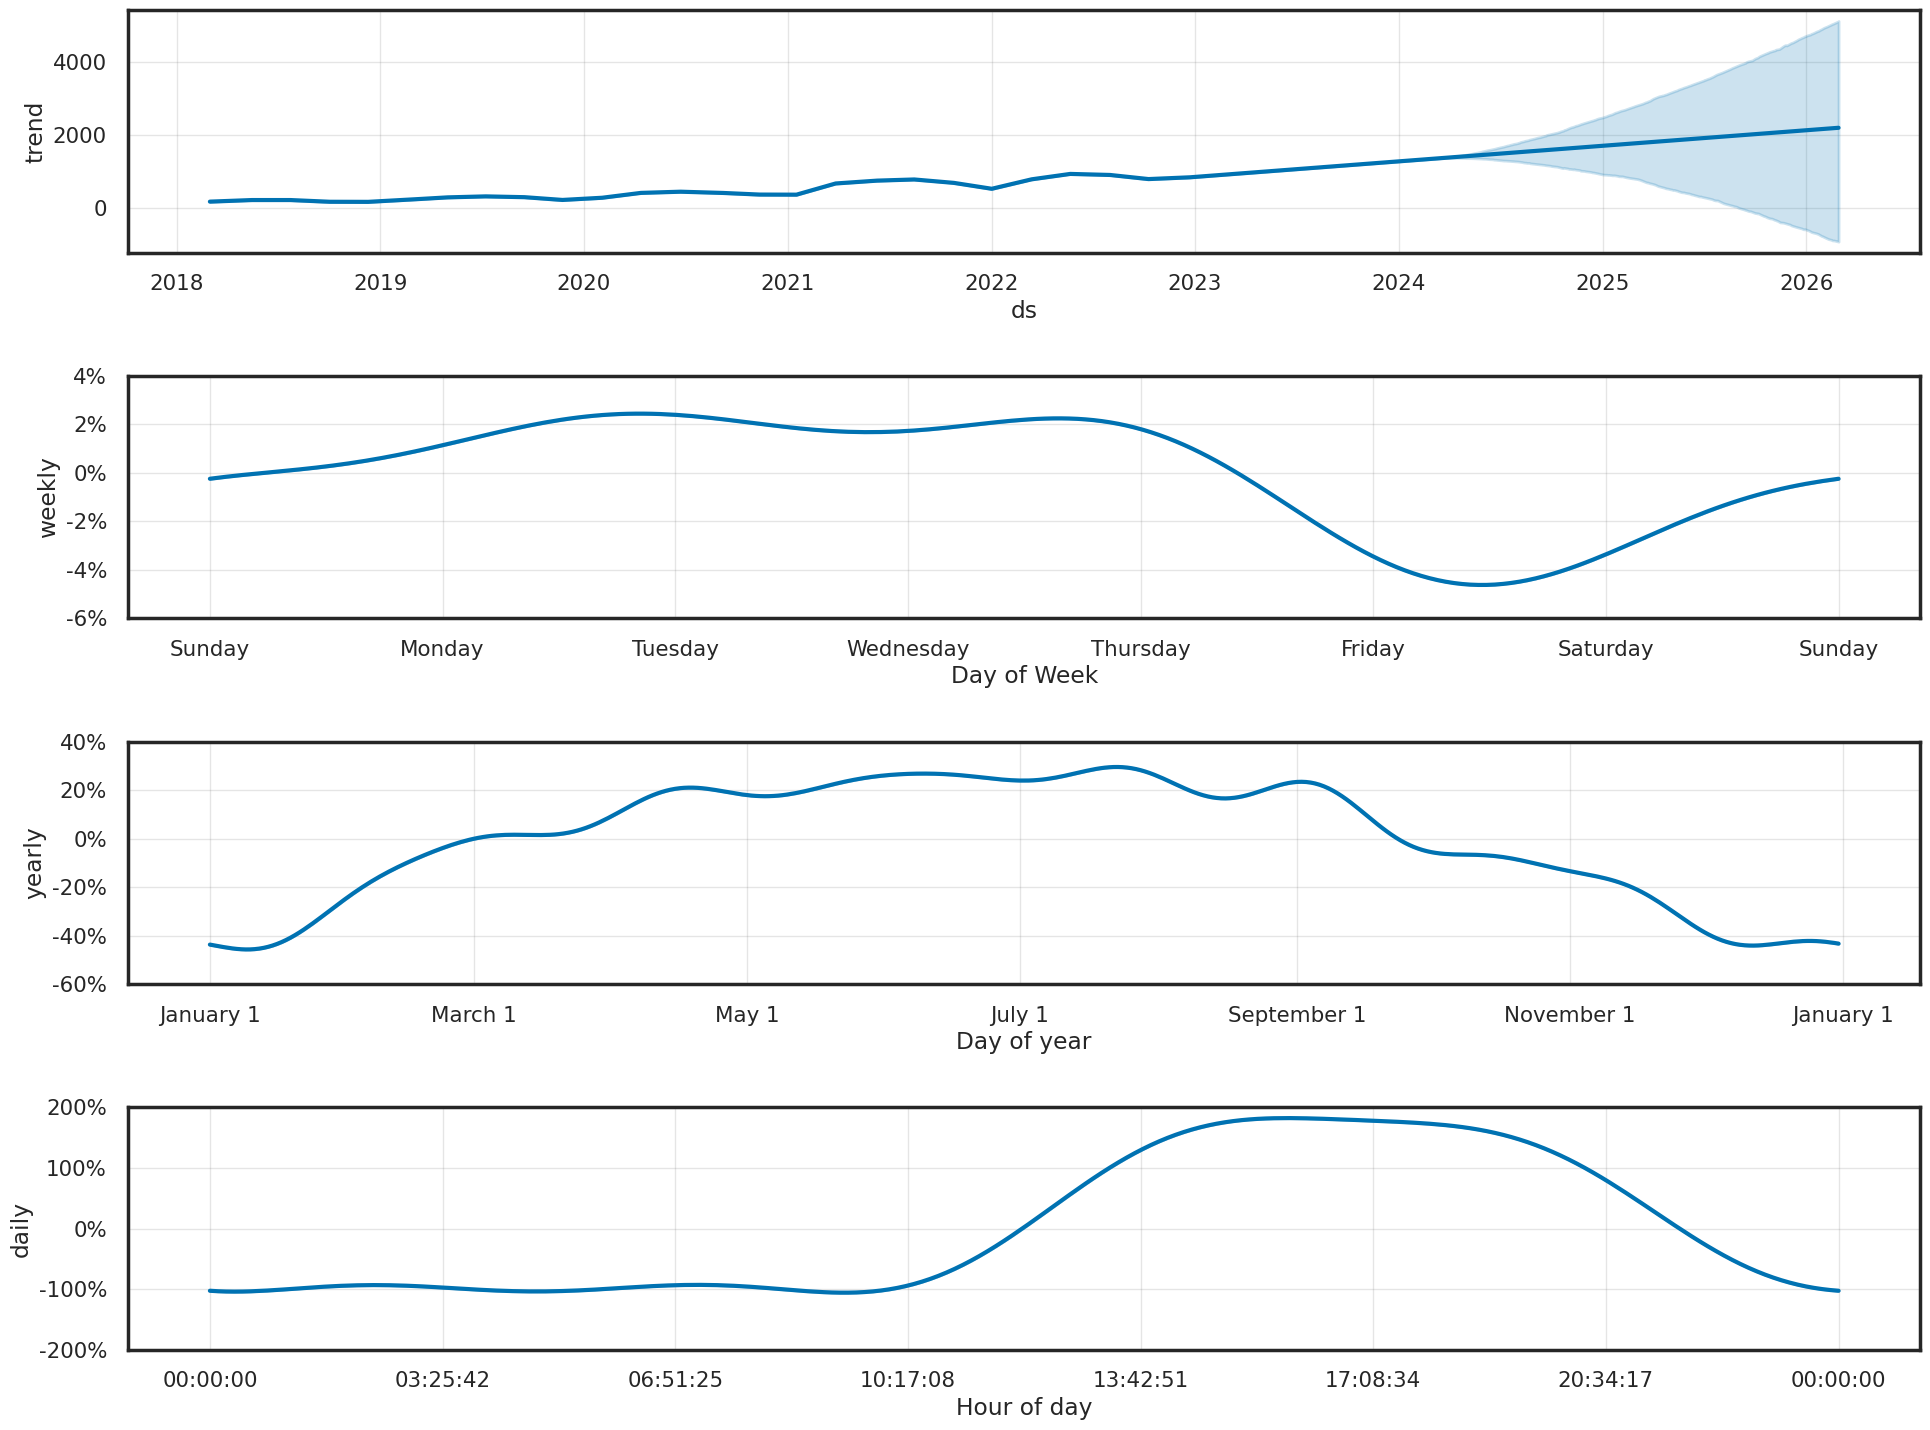

In [50]:
fig3 = model.plot_components(forecast,uncertainty=True,figsize=(20, 15))
plt.show()

In [51]:
df_solar = df_solar[(df_solar['ds'].dt.hour >= 6) & (df_solar['ds'].dt.hour < 18)]
df_solar.head()

ds  y
569152 2018-03-01 06:00:00  0
569141 2018-03-01 07:00:00  0
569130 2018-03-01 08:00:00  0
569119 2018-03-01 09:00:00  0
569108 2018-03-01 10:00:00  0

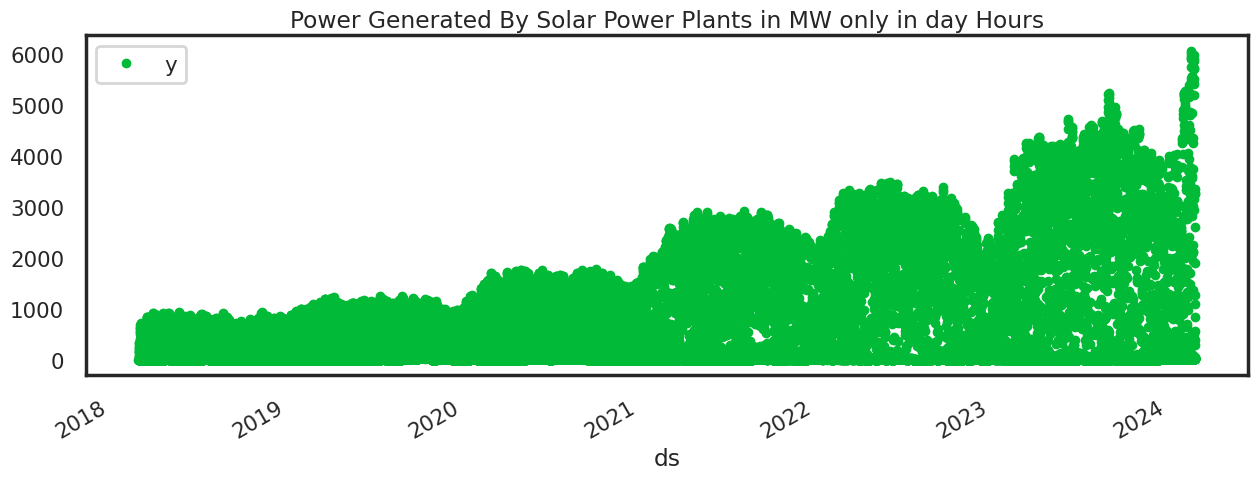

In [52]:
df5 = df_solar[["ds","y"]]
df5.set_index("ds", inplace = True)

# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00","#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
df5.plot(style='.', figsize=(15,5), color=color_pal[3], title='Power Generated By Solar Power Plants in MW only in day Hours')
plt.ylim();
plt.show()

13:03:39 - cmdstanpy - INFO - Chain [1] start processing
13:04:16 - cmdstanpy - INFO - Chain [1] done processing


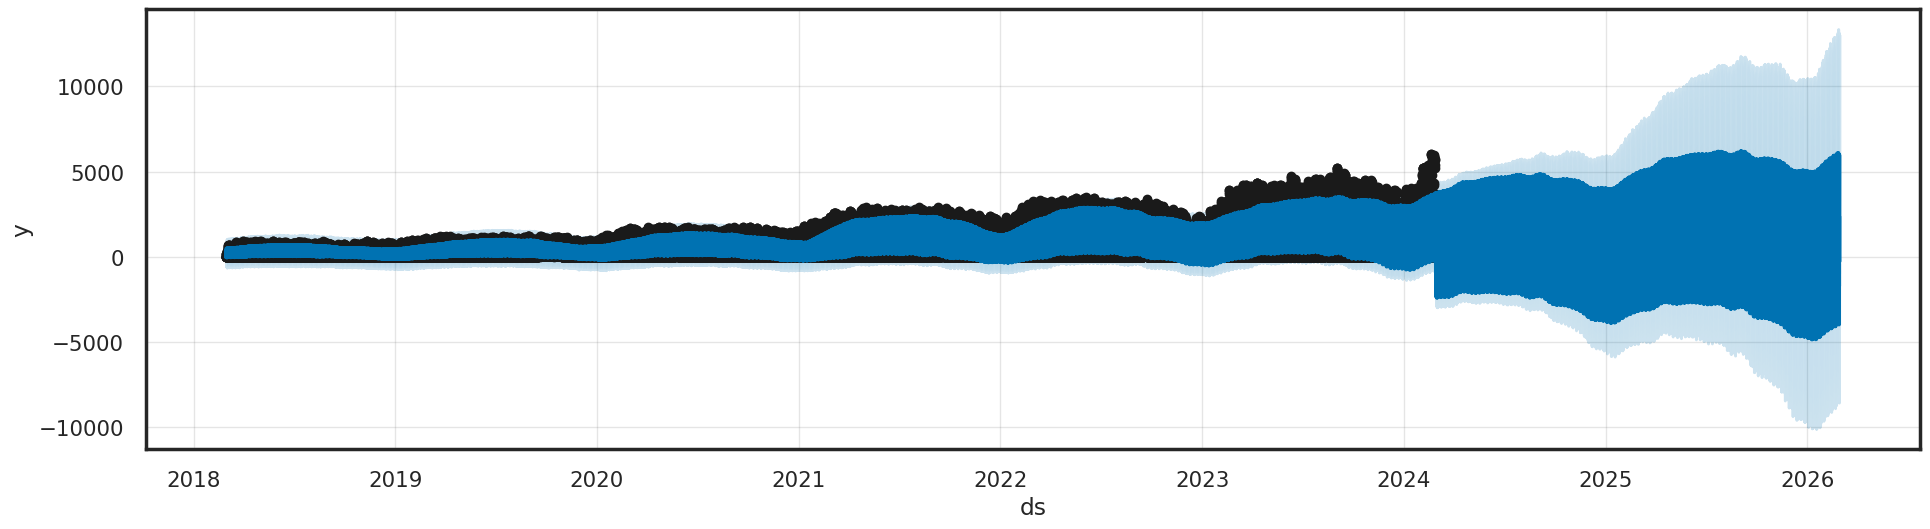

In [53]:
model = Prophet( daily_seasonality=True, 
                 weekly_seasonality=True,
                 yearly_seasonality=True,
                 seasonality_mode='multiplicative',
                 changepoint_prior_scale=0.5,
                 holidays_prior_scale=0.1)

model.fit(df_solar)

future = model.make_future_dataframe(periods=365*24*2,freq='H')
forecast = model.predict(future)
fig = model.plot(forecast,figsize=(20, 6))
plt.show()

In [54]:
df_solar.tail()

ds     y
289190 2024-02-28 13:00:00   286
289180 2024-02-28 14:00:00   559
289170 2024-02-28 15:00:00   840
289160 2024-02-28 16:00:00  1091
289150 2024-02-28 17:00:00  1269

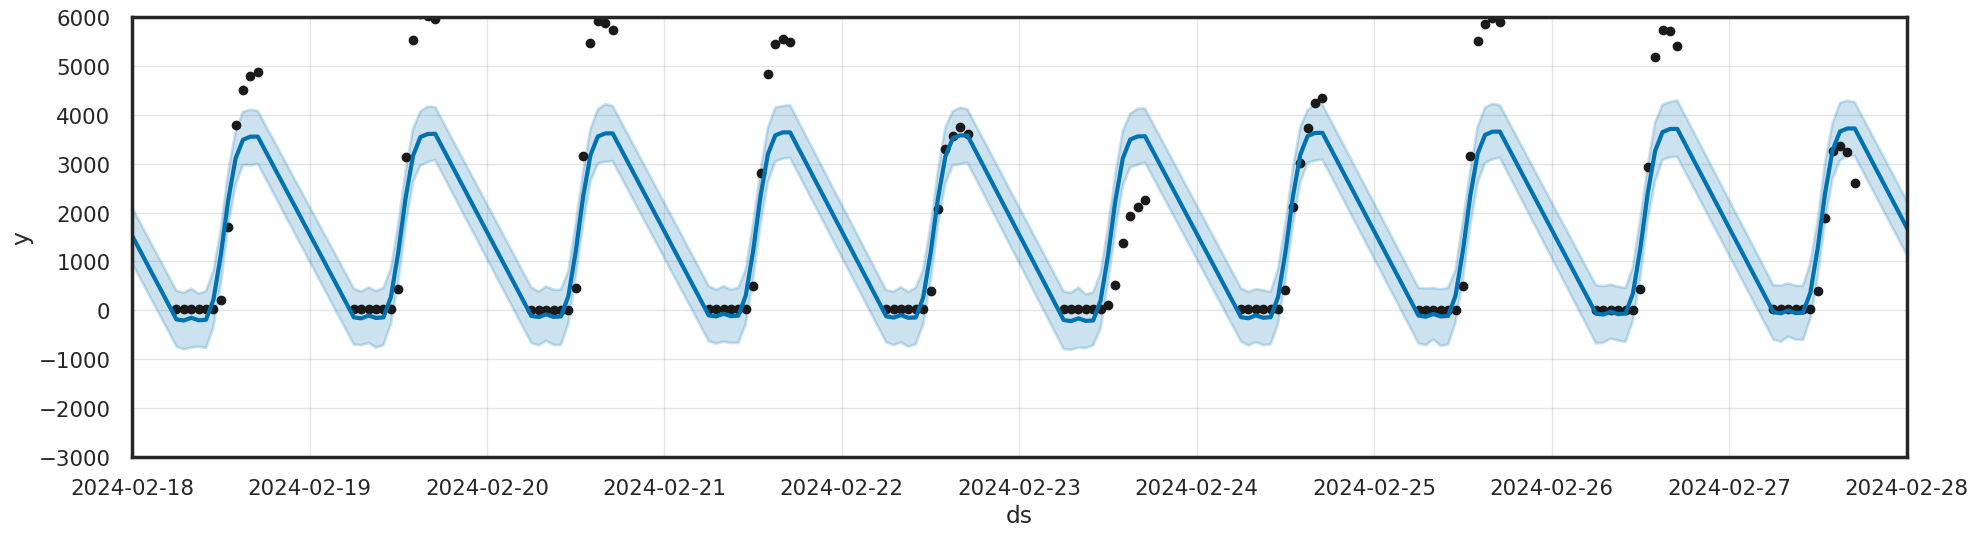

In [55]:
fig = model.plot(forecast,figsize=(20, 6))
plt.xlim(pd.to_datetime(['2024-02-18', '2024-02-28']))
plt.ylim(-3000,6000)
plt.show()

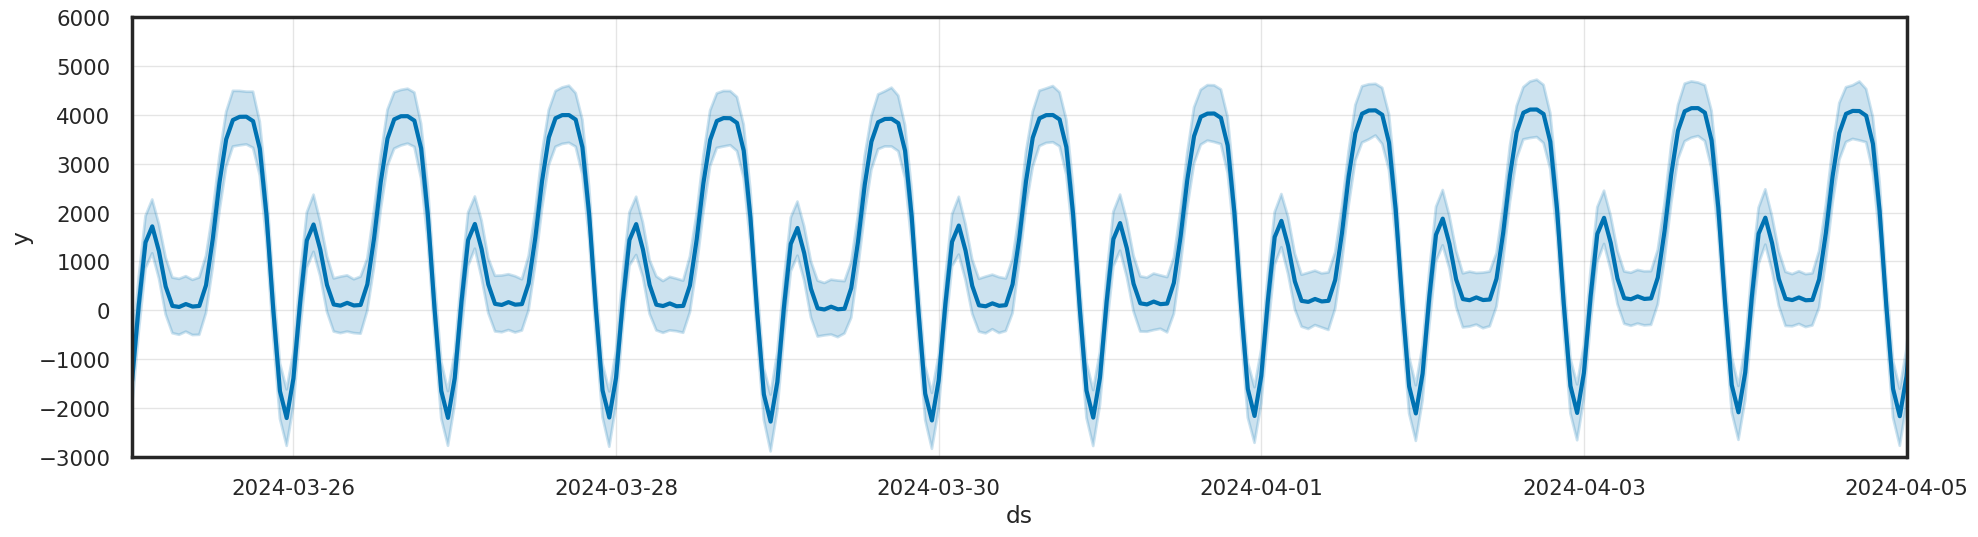

In [56]:
fig = model.plot(forecast,figsize=(20, 6))
plt.xlim(pd.to_datetime(['2024-03-25', '2024-04-05']))
plt.ylim(-3000,6000)
plt.show()

## **fb_Prophet Nighttime Predictions Need Improvement**

In [57]:
future2 = future[(future['ds'].dt.hour >= 6) & (future['ds'].dt.hour < 18)]

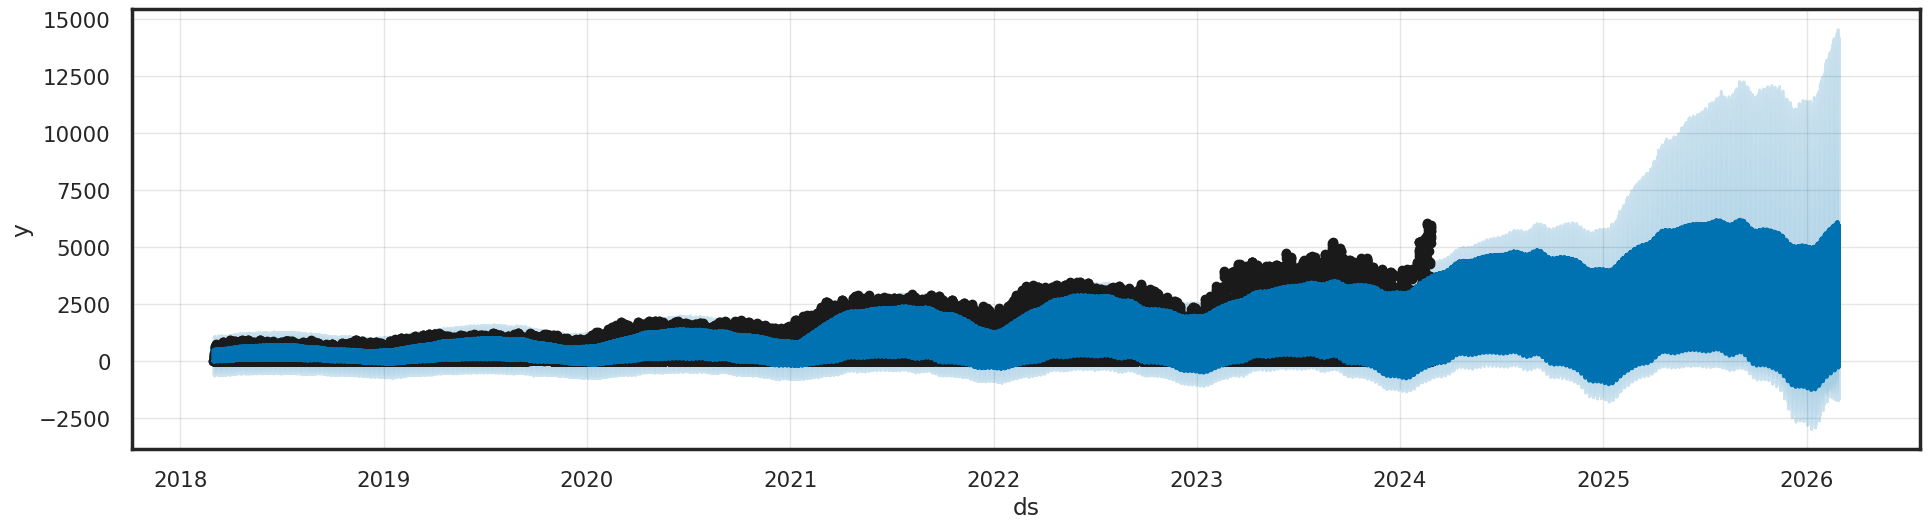

In [58]:
forecast2 = model.predict(future2)
fig = model.plot(forecast2,figsize=(20, 6))
plt.show()

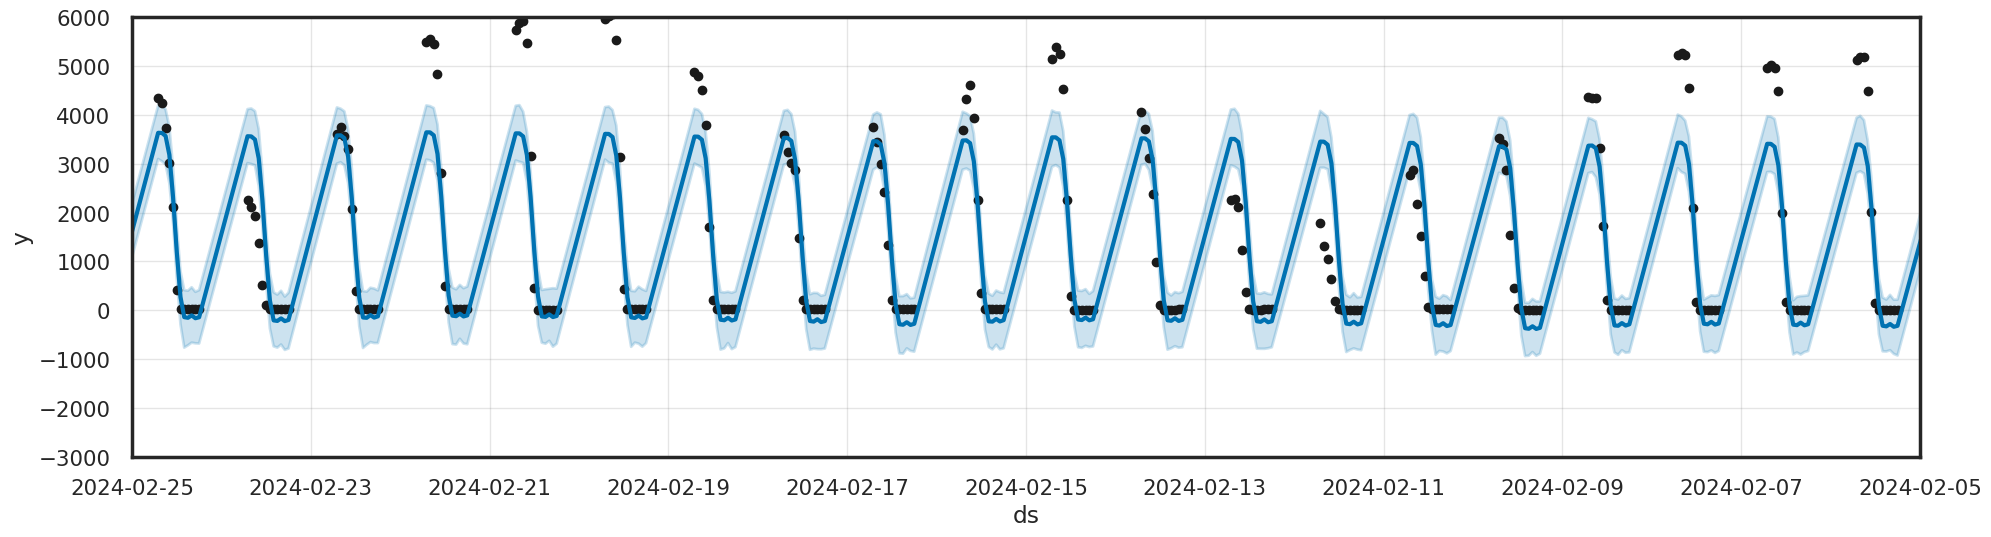

In [59]:
fig = model.plot(forecast2,figsize=(20, 6))
plt.xlim(pd.to_datetime(['2024-02-25', '2024-02-05']))
plt.ylim(-3000,6000)
plt.show()

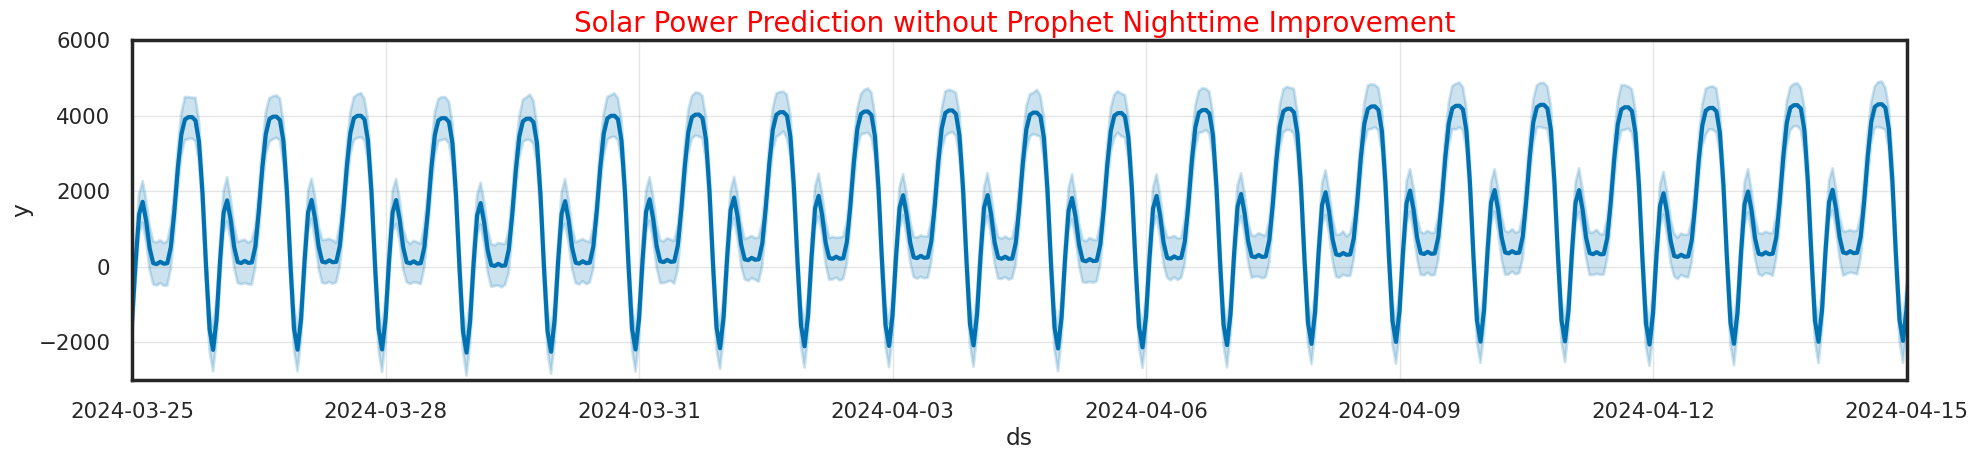

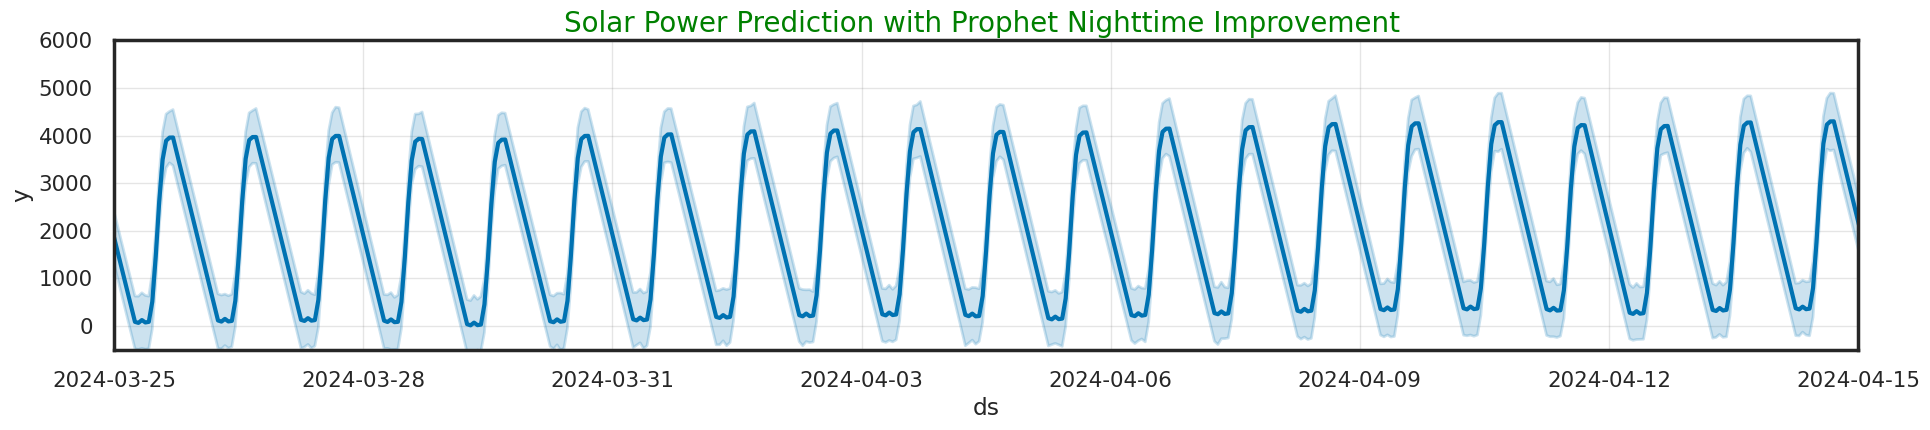

In [60]:
fig = model.plot(forecast,figsize=(20, 5))
plt.xlim(pd.to_datetime(['2024-03-25', '2024-04-15']))
plt.ylim(-3000,6000)
plt.title("Solar Power Prediction without Prophet Nighttime Improvement ",fontsize=20,color='Red')
plt.show()

fig = model.plot(forecast2,figsize=(20, 5))
plt.xlim(pd.to_datetime(['2024-03-25', '2024-04-15']))
plt.ylim(-500,6000)
plt.title("Solar Power Prediction with Prophet Nighttime Improvement ",fontsize=20,color='Green')
plt.tight_layout()
plt.savefig('SolarPowerPrediction.png');
plt.show()